<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Modulo3/aulas_modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.ticker as ticker

# Aula 1 - Entendendo a série temporal

In [243]:
url_dados = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'

dados = pd.read_csv(url_dados, sep=';', compression='zip')

In [244]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [245]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [246]:
# definindo os parâmetros para as figuras a ser plotadas
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15, 8)

In [247]:
import seaborn as sns

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Número de casos')

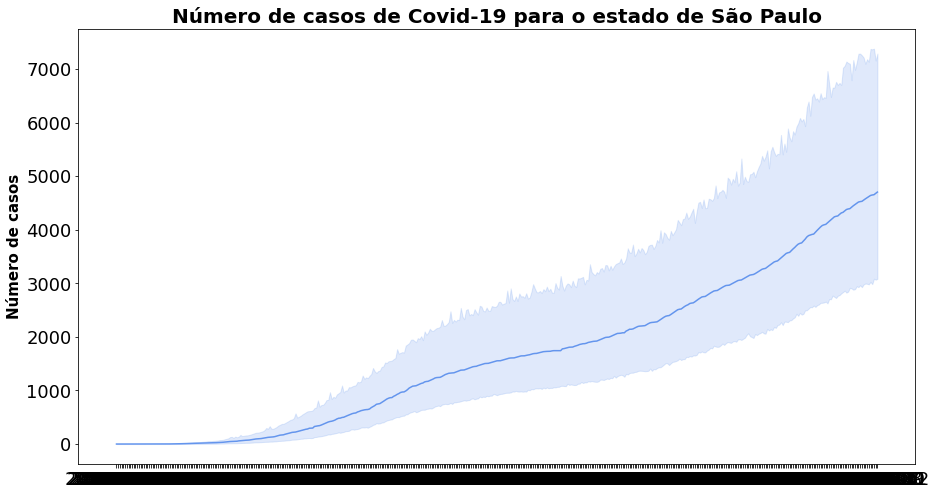

In [248]:
sns.lineplot(x='datahora', y='casos', data=dados, color='cornflowerblue')
plt.title('Número de casos de Covid-19 para o estado de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

In [249]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [250]:
# alterando a coluna datahora para datetime utilidando o pd.to_datetime

dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]), <a list of 8 Text major ticklabel objects>)

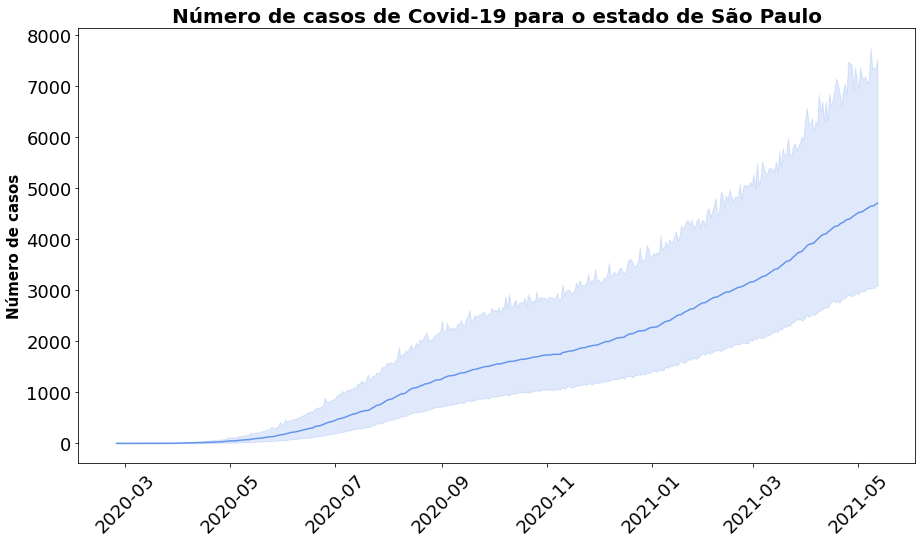

In [251]:
sns.lineplot(x='datahora', y='casos', data=dados, color='cornflowerblue')
plt.title('Número de casos de Covid-19 para o estado de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)

### No gráfico acima temos os casos para cada município do estado de SP, isso causa a demora em plotar o gráfico. A linha azul forte representa a média do número de casos e o intervalo azul claro representa o máximo/minímo número de casos nos municípios.

### Podemos ver no gráfico que o crescimento do número de casos ao longo do tempo aparenta ser exponencial (os casos aumentam em função de uma multiplicação). Para comparar com uma curva de crescimento exponencial padrão vamos importar o numpy para criar essa curva.

$$ e^x$$ 

In [252]:
import numpy as np

In [253]:
eixo_x = np.linspace(-2,2,100)

In [254]:
y_exp = np.exp(eixo_x)

Text(0, 0.5, '')

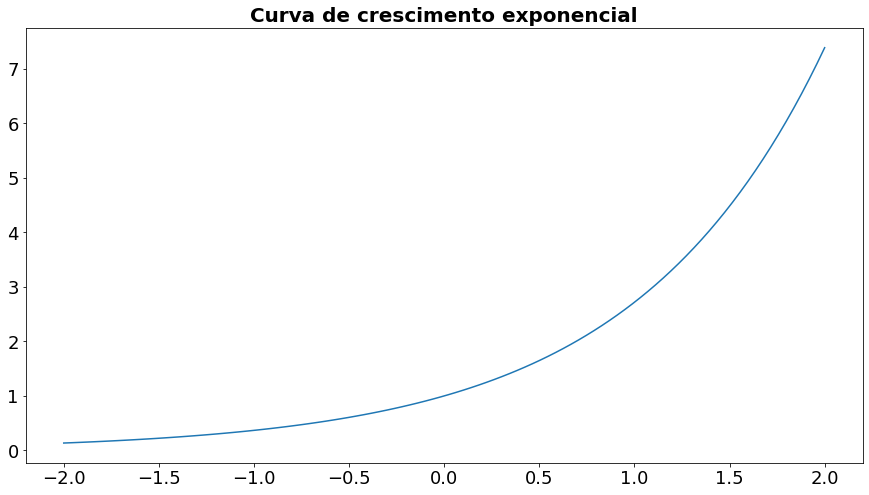

In [255]:
sns.lineplot(x = eixo_x, y = y_exp)
plt.title('Curva de crescimento exponencial', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('', fontsize=15, fontweight='bold')

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

## O Logaritmo de 2 na base 2 é igual 1.
## O Logaritmo de 2 elevado a x na base 2 é igual a x.
## O Logarito de **e** elevado a **x** na base **e** é igual a **x**.

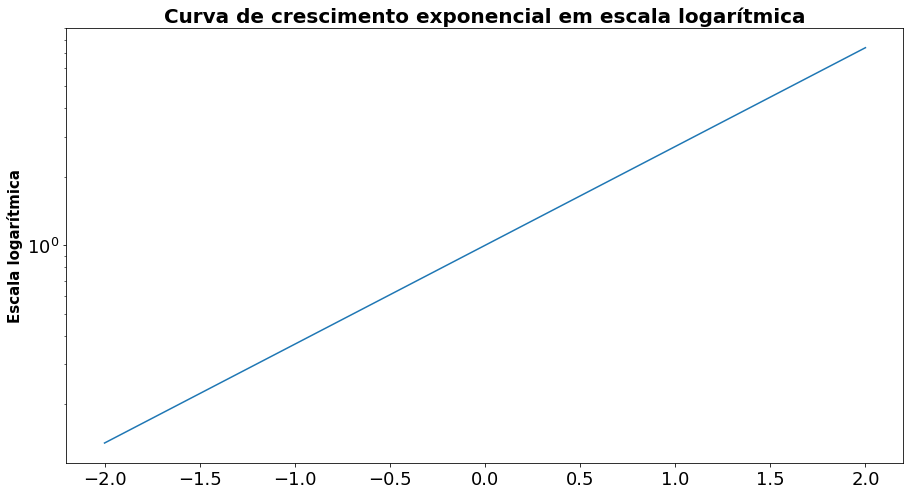

In [256]:
# ao aplicar o logaritmo na escala do eixo y o resultado é uma linha reta, o valor do eixo x será o mesmo valor no eixo y
sns.lineplot(x = eixo_x, y = y_exp)
plt.title('Curva de crescimento exponencial em escala logarítmica', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Escala logarítmica', fontsize=15, fontweight='bold')
mpl.pyplot.yscale('log')

## Ao aplicar o logaritmo na escala do eixo y em uma curva de crescimento exponencial temos uma reta.

## Podemos testar os dados que temos dessa maneira para determinar se temos uma taxa de crescimento exponencial. Mas faremos isso somente com os dados da cidade de SP. 

In [257]:
dados_sp = dados.query("nome_munic == 'São Paulo'")

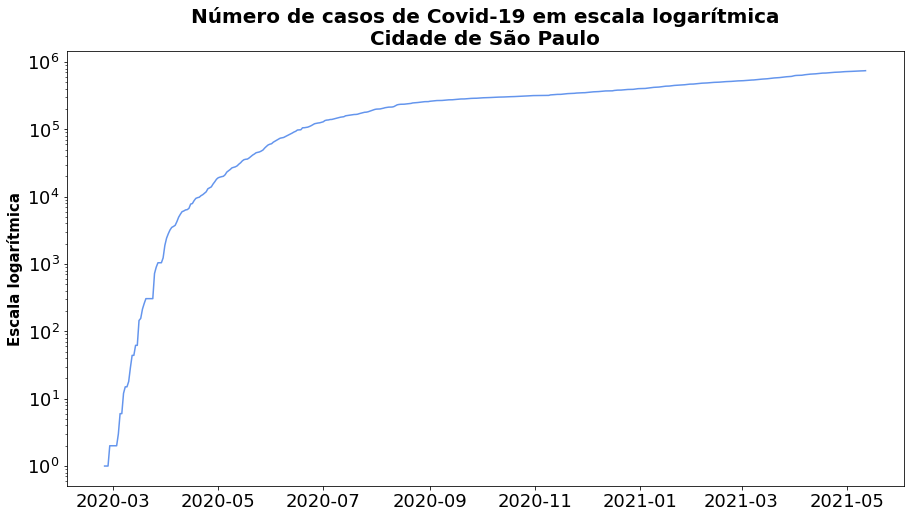

In [258]:
sns.lineplot(data = dados_sp, x='datahora', y='casos', color='cornflowerblue')
plt.title('Número de casos de Covid-19 em escala logarítmica\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Escala logarítmica', fontsize=15, fontweight='bold')
mpl.pyplot.yscale('log')

## No gráfico acima não temos uma reta perfeita como no nosso exemplo, mas podemos ver alguns segmentos de reta em certos períodos. Isso indica ainda um crescimento exponencial mas que teve seu fator exponencial alterado ao longo do tempo.

In [259]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]), <a list of 8 Text major ticklabel objects>)

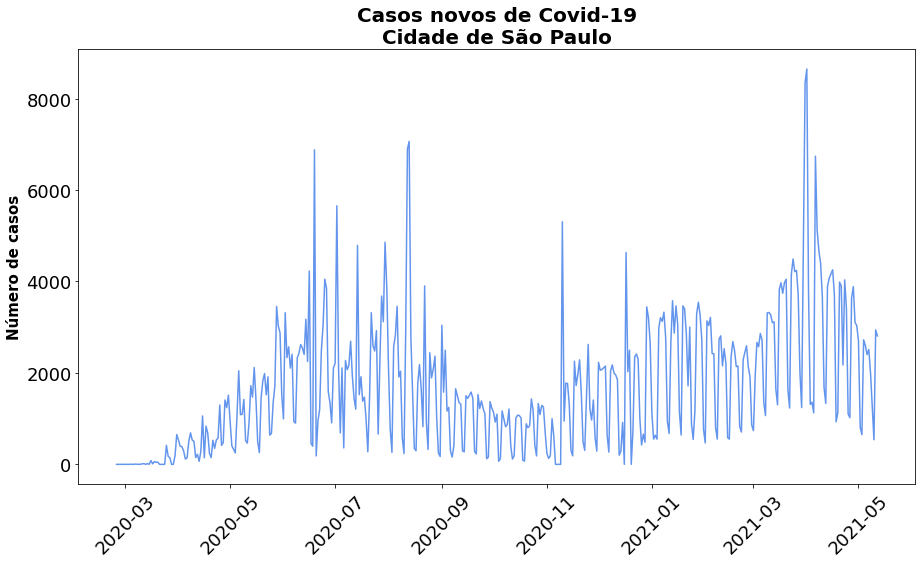

In [260]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos', color='cornflowerblue')
plt.title('Casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)

In [261]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [262]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

### Criamos agora uma coluna com dados diferenciados em função da nossa coluna original. Dados diferenciado é criado pegando o valor e subtraindo pelo valor anterior. No nosso exemplo temos uma progressão linear de 1 a 10. O primeiro valor será um NaN pois ele não tem um valor anterior para subtrair, depois será 2-1, 3-2, 4-3... etc. Gerando sempre o valor 1.

In [263]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo.head()

0  diferenciado
0  1.0           NaN
1  2.0           1.0
2  3.0           1.0
3  4.0           1.0
4  5.0           1.0

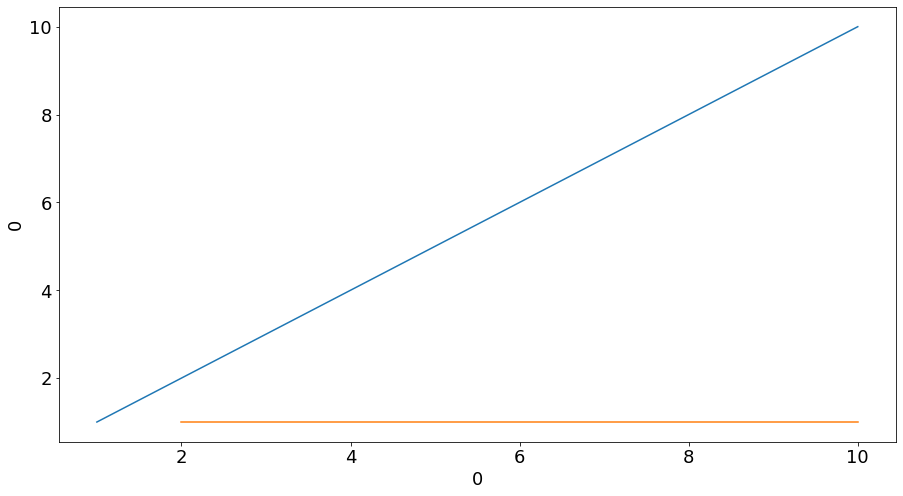

In [264]:
sns.lineplot(data=dados_exemplo, x=0, y=0)
sns.lineplot(data=dados_exemplo, x=0, y = 'diferenciado')

### Aqui temos uma reta sempre igual pois o valor da diferença é sempre o mesmo. No nosso exemplo o valor da diferença é sempre 1.

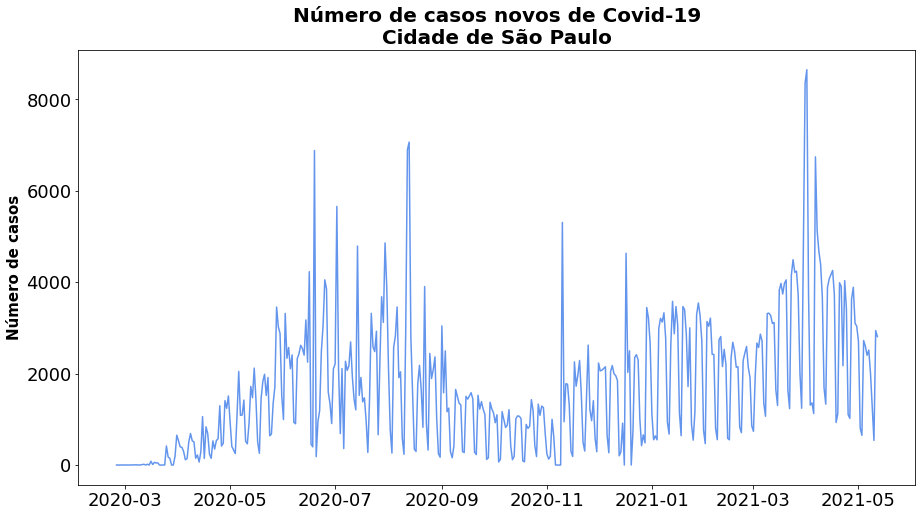

In [265]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos', color='cornflowerblue')
plt.title('Número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

### Com o nosso exemplo acima, e sabendo que o crescimento do número de casos não é linear, não devemos ter uma linha reta quando verificarmos a diferenciação.

In [266]:
# calculando a diferenciação dos casos e óbitos novos
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

In [267]:
dados_sp.head()

nome_munic  ...  taxa_de_crescimento_obitos
562   São Paulo  ...                         NaN
1207  São Paulo  ...                         0.0
1852  São Paulo  ...                         0.0
2497  São Paulo  ...                         0.0
3142  São Paulo  ...                         0.0

[5 rows x 28 columns]

(array([737485., 737546., 737607., 737669., 737730., 737791., 737850.,
        737911.]), <a list of 8 Text major ticklabel objects>)

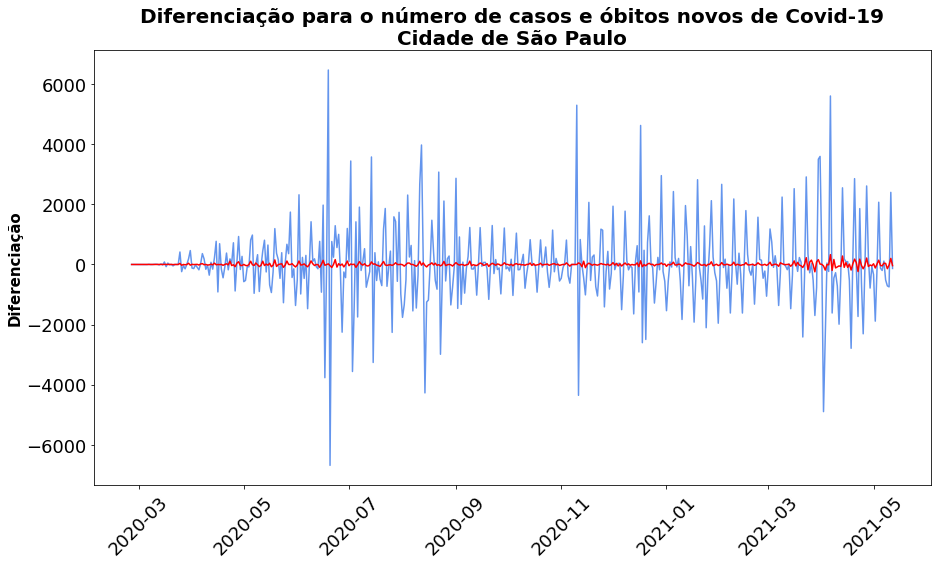

In [268]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_casos', color='cornflowerblue')
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos', color='red')
plt.title('Diferenciação para o número de casos e óbitos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)

### No gráfico acima vemos que a diferenciação para o número de casos varia bastante a partir do 0. Com picos tanto para valores acima ou abaixo de 0. Isso indica picos de casos novos sendo informados em alguns dias, o que causa um pico negativo em seguida pois o número de casos informado é um valor menor que no dia anterior.

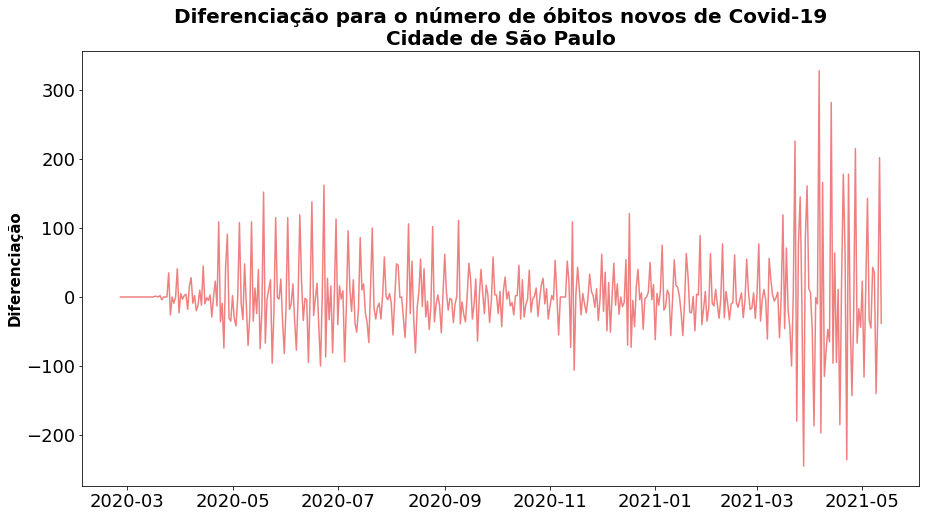

In [269]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos', color='lightcoral')
plt.title('Diferenciação para o número de óbitos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.show()

### Nesse gráfico do número de óbitos novos temos uma escala no eixo y menor do que de casos novos.

In [270]:
import matplotlib.pyplot as plt

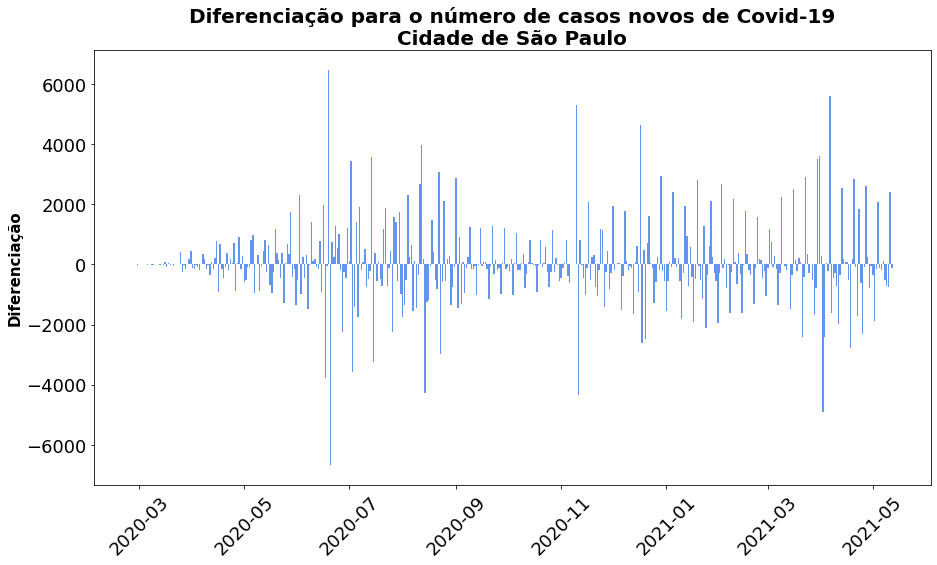

In [271]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'], color='cornflowerblue')
plt.title('Diferenciação para o número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

In [272]:
# criando uma coluna nova para identificar o ano dos dados do dataframe / lembrando que no inicio indicamos que os 4 primeiros caracteres são o ano (%Y)
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [273]:
dados_sp['ano']

562       2020
1207      2020
1852      2020
2497      2020
3142      2020
          ... 
283072    2021
283717    2021
284362    2021
285007    2021
285652    2021
Name: ano, Length: 443, dtype: int64

In [274]:
dados_2021 = dados_sp.query("ano == 2021")

In [275]:
dados_2021.head()

nome_munic  codigo_ibge  ...  taxa_de_crescimento_obitos   ano
201157  São Paulo      3550308  ...                       -62.0  2021
201802  São Paulo      3550308  ...                         5.0  2021
202447  São Paulo      3550308  ...                       -12.0  2021
203092  São Paulo      3550308  ...                         9.0  2021
203737  São Paulo      3550308  ...                        75.0  2021

[5 rows x 29 columns]

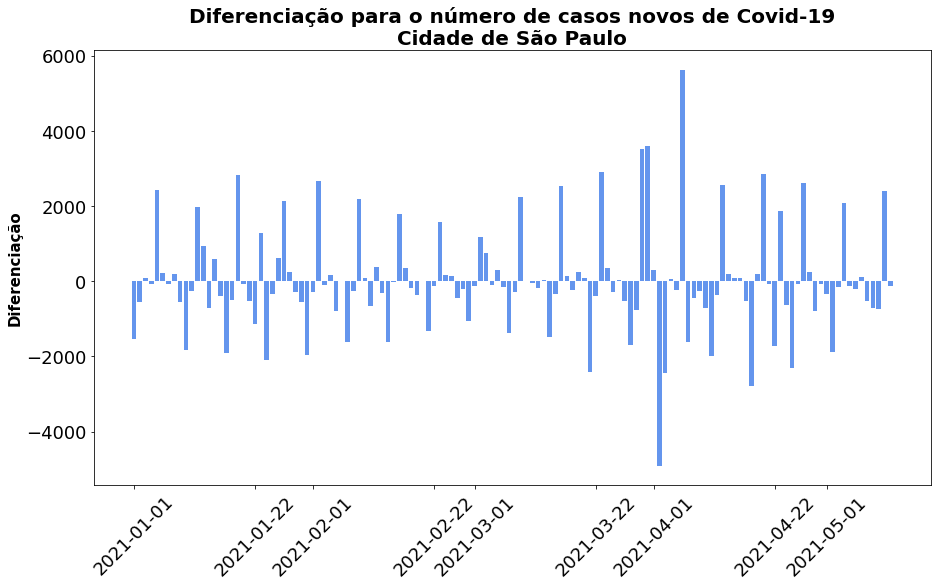

In [276]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'], color='cornflowerblue')
plt.title('Diferenciação para o número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

### No gráfico acima podemos extrair muitas informações como picos de casos informados, uma queda brusca no valor de casos informados, dias seguidos com valores altos de casos novos.

### No gráfico de linha para o número de casos novos podemos extrair uma média móvel para uma determinada janela. A função rolling() criará uma janela dentro dos dados e seguirá "rolando" através de todo o dataframe. Após isso podemos calcular a média dentro dessa janela. Isso será feito logo abaixo.

In [277]:
# para extrair a média móvel dos dados será criada uma nova coluna com base na coluna casos_novos
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()

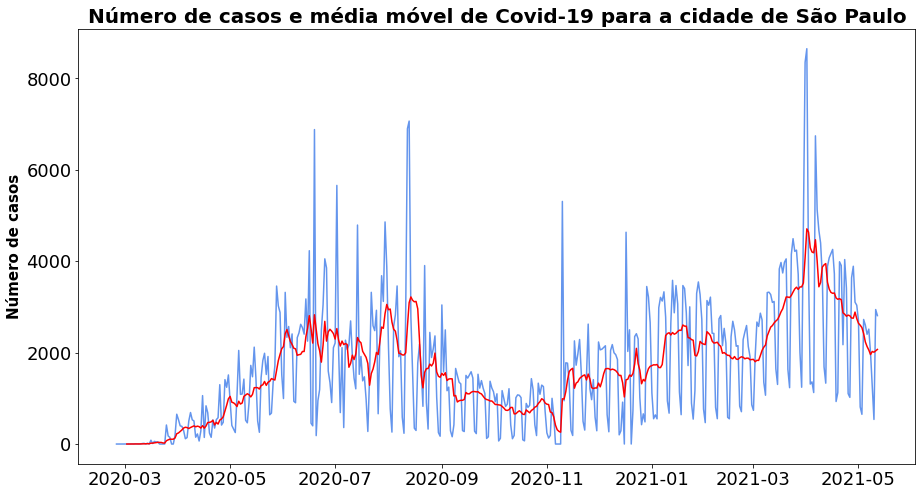

In [278]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos', color='cornflowerblue')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos', color='red')
plt.title('Número de casos e média móvel de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

### Para verificar se uma série temporal está relacionado com outra série temporal. Podemos plotar um gráfico dessas séries temporais.

### No exemplo abaixo plotamos um gráfico dos casos_novos pelos casos_novos. Nesse exemplo temos uma correlação perfeita, pois os dados são iguais.

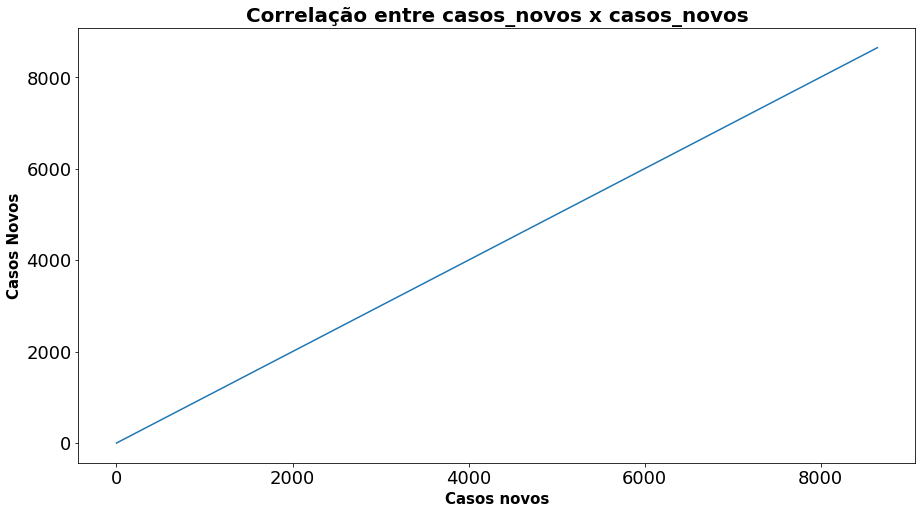

In [279]:
sns.lineplot(x='casos_novos', y = 'casos_novos', data=dados_sp)
plt.title('Correlação entre casos_novos x casos_novos', fontsize = 20, fontweight = 'bold')
plt.xlabel('Casos novos', fontsize=15, fontweight='bold')
plt.ylabel('Casos Novos', fontsize=15, fontweight='bold')
plt.show()

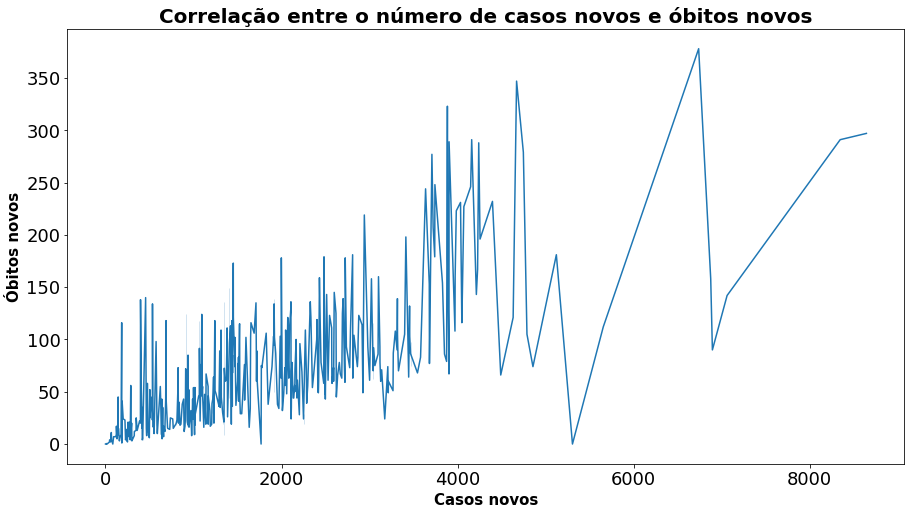

In [280]:
sns.lineplot(data=dados_sp, x='casos_novos', y='obitos_novos')
plt.title('Correlação entre o número de casos novos e óbitos novos', fontsize = 20, fontweight = 'bold')
plt.xlabel('Casos novos', fontsize=15, fontweight='bold')
plt.ylabel('Óbitos novos', fontsize=15, fontweight='bold')
plt.show()

In [281]:
# selecionando os dados do mês 1 do ano 2021
dados_202101 = dados_sp.query("mes == 1 and ano == 2021")

# selecionando os dados do mês 2 do ano 2021
dados_202102 = dados_sp.query("mes == 2 and ano == 2021")

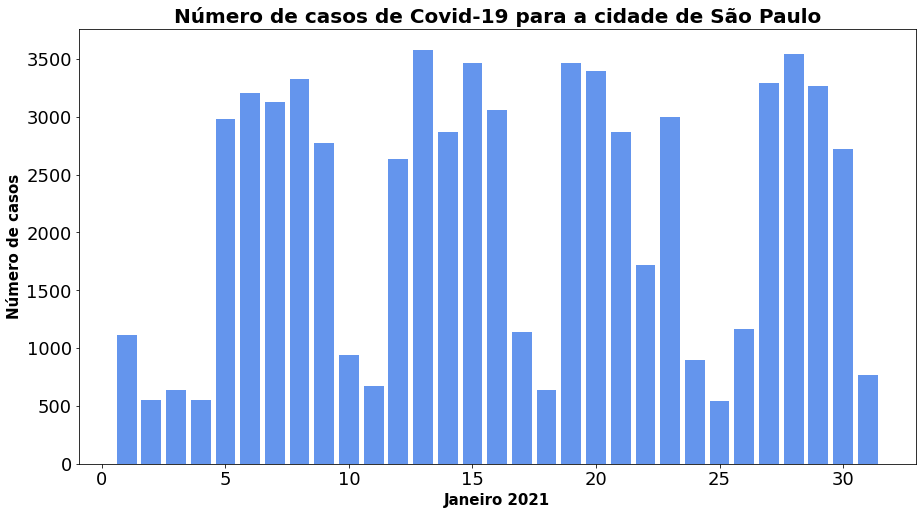

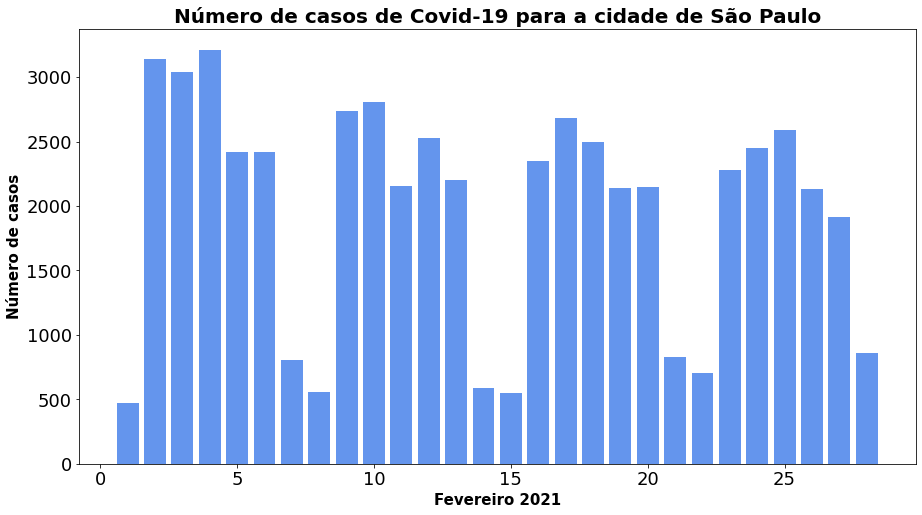

In [282]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'], color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Janeiro 2021', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'], color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Fevereiro 2021', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

### Nos gráficos acima podemos identificar que geralmente temos 5 dias com alta no número de casos novos e 2 dias com uma baixa. Isso é a **SAZONALIDADE**.

### Para identificar uma sazonalidade em um conjunto de dados devemos aplicar uma função de correlação aos dados. Podemos fazer isso com o próprio Pandas.

In [283]:
from pandas.plotting import autocorrelation_plot

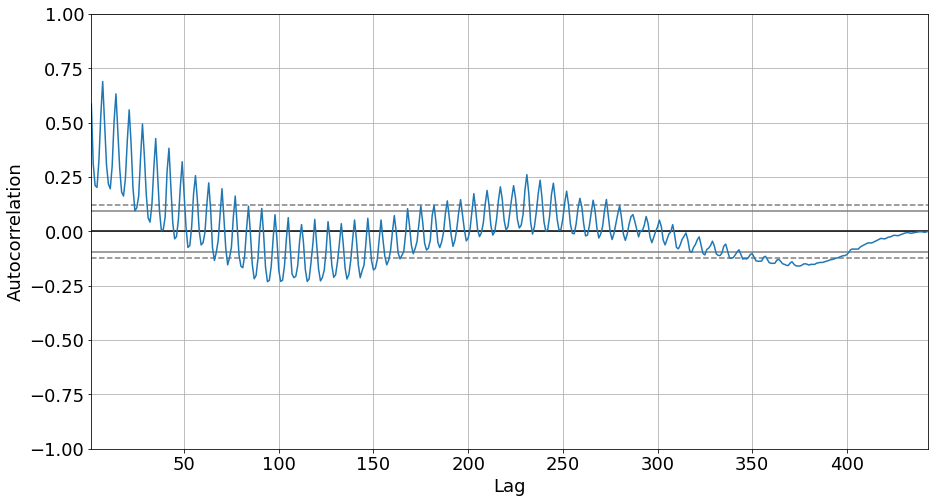

In [284]:
autocorrelation_plot(dados_sp['casos_novos'])

### A autocorrelação é utilizada para identificar se existe uma relação dos dados com o tempo, se há alguma relação entre os dados com o passar do tempo. No gráfico acima podemos ver picos com valores altos próximos a 1. Isso indica uma dependência dos dados em relação ao tempo. E a direita do gráfico temos a linha se aproximando de zero, mostrando que os dados do momento atual da pandemia não tem uma correlação com o que acontecia no início da pandemia.

### No gráfico abaixo geramos uma série com valores aleatórios e aplicamos ele na função de autocorrelação. Vemos que o gráfico fica sempre muito próximo de zero, mostrando que não há uma relação entre os dados e o passar do tempo.

In [285]:
dados_sp.shape

(443, 31)

In [286]:
aleatorio = np.random.rand(443)

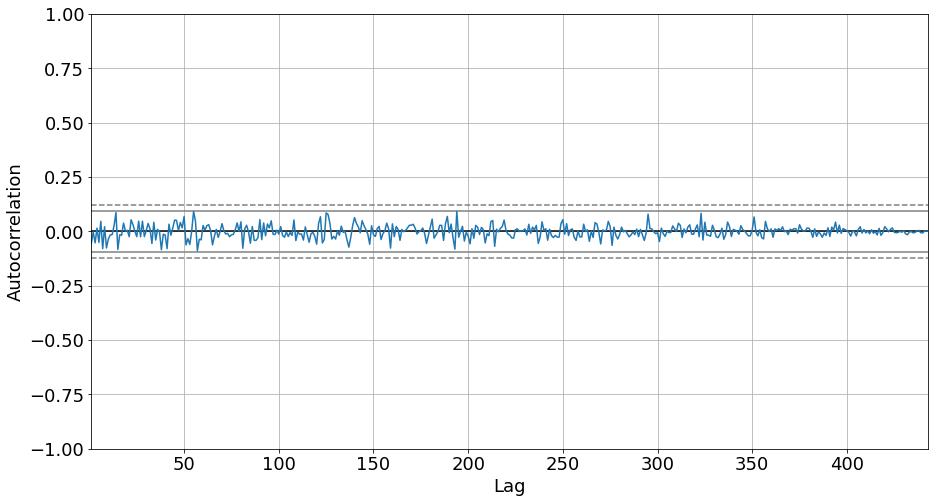

In [287]:
autocorrelation_plot(aleatorio)

# Desafio 01: Um notebook sem warnings



In [288]:
# para remover os warning importamos a biblioteca warnings e definimos para que os avisos sejam ignorados
import warnings
warnings.filterwarnings('ignore')

# Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.



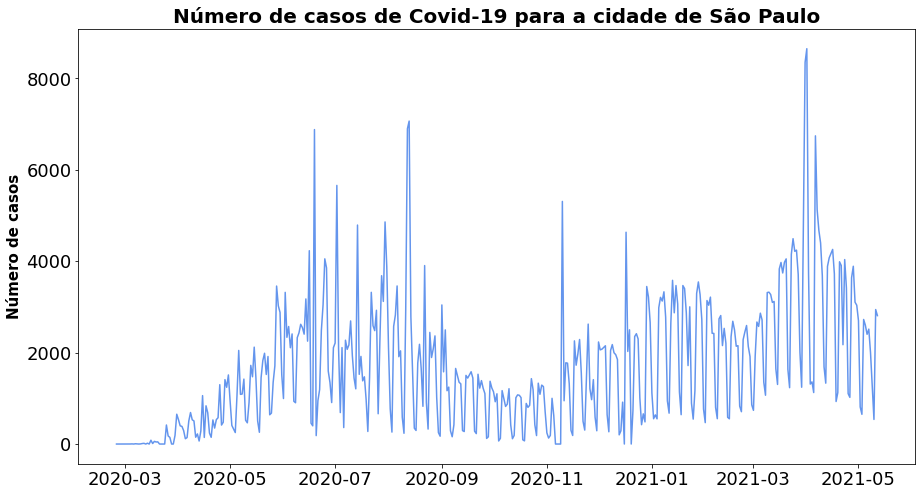

Text(0, 0.5, 'Número de óbitos')

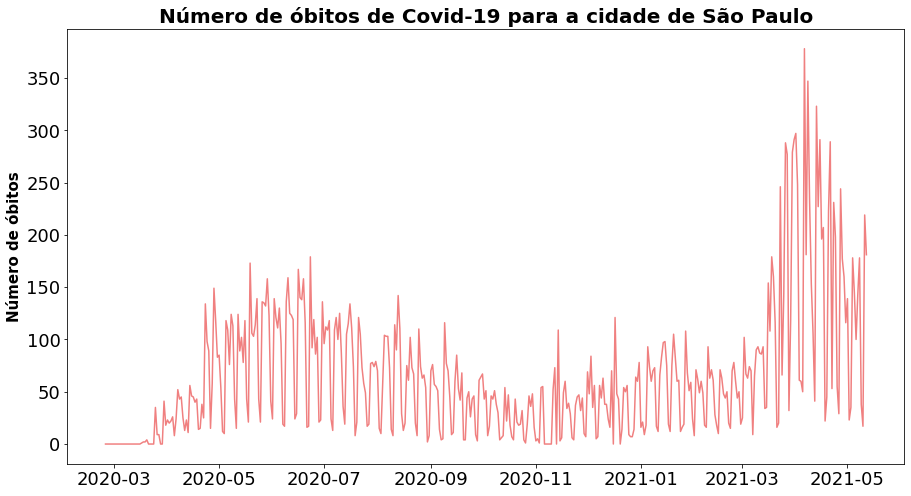

In [289]:
# verificando os picos de casos novos
sns.lineplot(data = dados_sp, x='datahora', y = 'casos_novos', color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()
# verificando os picos de óbitos novos
sns.lineplot(data = dados_sp, x='datahora', y = 'obitos_novos', color='lightcoral')
plt.title('Número de óbitos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')


In [290]:
# entre os meses de junho (6) e agosto (8) pode-se ver alguns picos no número de casos, selecionando esse dados para comparar com os óbitos
dados_sp_0608 = dados_sp.query("mes == 6 or mes == 7 or mes == 8")

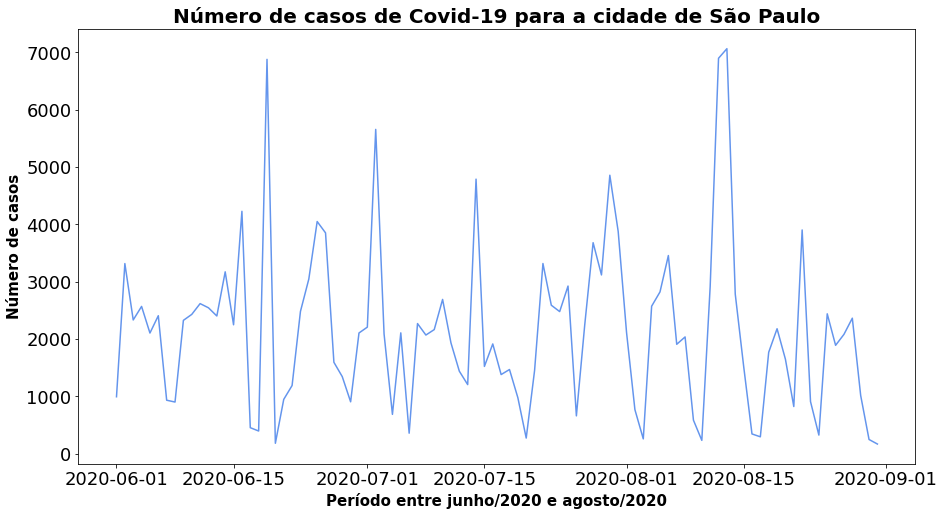

Text(0, 0.5, 'Número de óbitos')

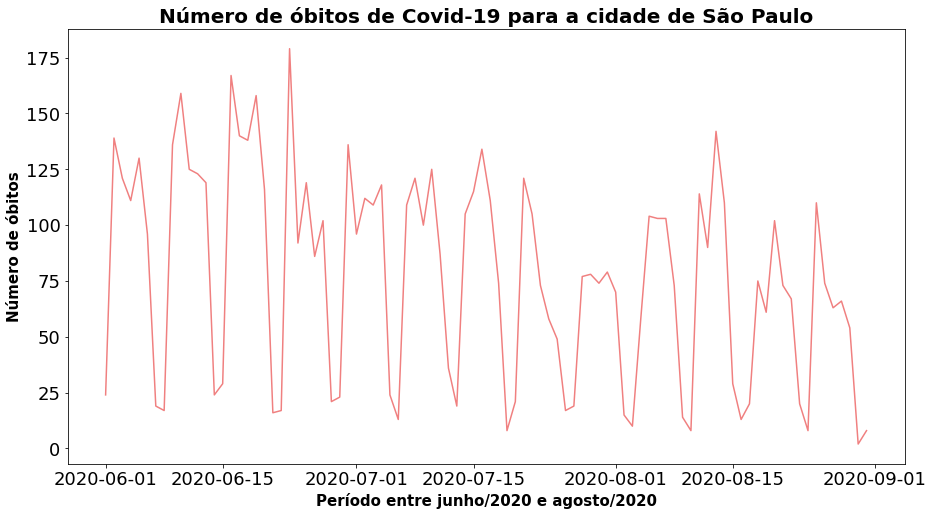

In [291]:
# plotando os gráficos para comparar esse período entre casos e óbitos
sns.lineplot(data = dados_sp_0608, x='datahora', y = 'casos_novos', color='cornflowerblue')
plt.title('Número de casos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Período entre junho/2020 e agosto/2020', fontsize=15, fontweight='bold')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()
# verificando os picos de óbitos novos nesse período
sns.lineplot(data = dados_sp_0608, x='datahora', y = 'obitos_novos', color = 'lightcoral')
plt.title('Número de óbitos de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('Período entre junho/2020 e agosto/2020', fontsize=15, fontweight='bold')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

### Podemos identificar nos gráficos quando há um aumento no número de novos casos o número de óbitos também aumenta, mas não podemos ver no gráfico um crescimento tão agressivo nos óbitos como o pico no número de casos leva a crer que aconteceria.

# Desafio 03: Fazer melhorias nos gráficos.



In [292]:
# feito durante o curso

# Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.



Text(0, 0.5, 'Número de óbitos')

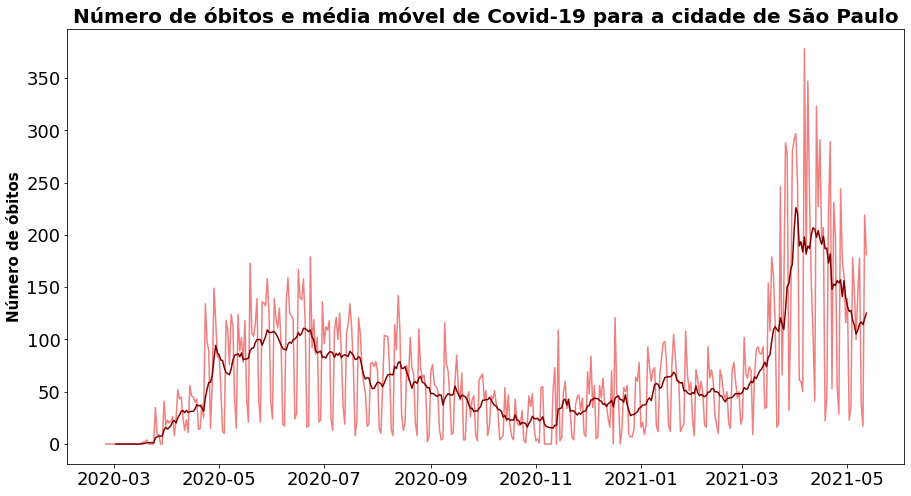

In [293]:
# a coluna de média movel para óbitos já foi criada durante a aula
# dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()
sns.lineplot(data=dados_sp, x='datahora', y = 'obitos_novos', color='lightcoral')
sns.lineplot(data=dados_sp, x = 'datahora', y = 'media_movel_obitos', color='maroon')
plt.title('Número de óbitos e média móvel de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

Text(0, 0.5, 'Número de casos')

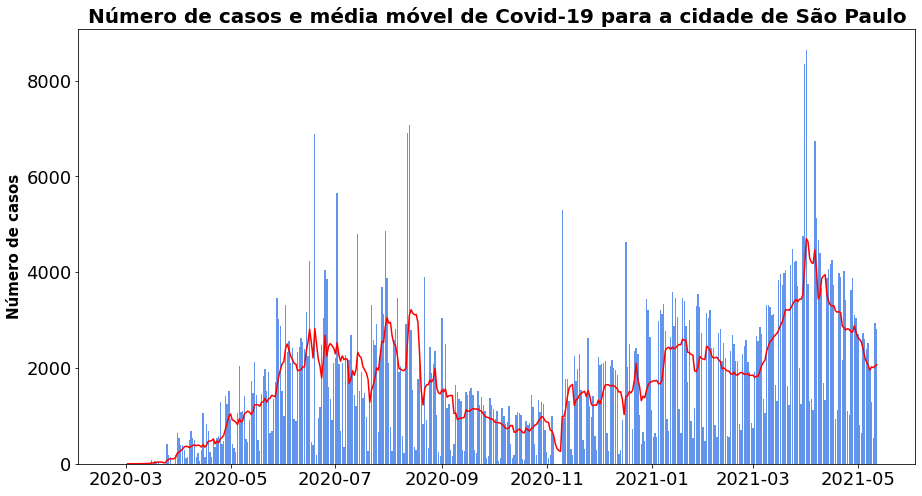

In [294]:
# alterando os gráficos de casos para um gráficos de barras
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'], color='cornflowerblue')
sns.lineplot(data = dados_sp, x='datahora', y='media_movel_casos', color='red')
plt.title('Número de casos e média móvel de Covid-19 para a cidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

# Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.



# Desafio 06: Função de correlação cruzada dos óbitos e casos.



In [295]:
# conforme mencionado na aula, a biblioteca statsmodels possui uma função para realizar a correlação cruzada
# a função utilizada é statsmodels.tsa.stattools.ccf(x,y,adjusted=True)

# importando a biblioteca da statsmodels para utilizar a função ccf()
import statsmodels.tsa.stattools as smt


corr_cruz = smt.ccf(dados_sp['casos_novos'], dados_sp['obitos_novos'])

In [296]:
corr_cruz

array([ 7.35532357e-01,  5.19808142e-01,  2.97688625e-01,  2.06024095e-01,
        2.09102712e-01,  2.93526865e-01,  4.58162621e-01,  6.09843905e-01,
        4.60437279e-01,  2.70171612e-01,  1.89597399e-01,  1.74392383e-01,
        2.34357310e-01,  3.87877700e-01,  5.84620853e-01,  4.20037614e-01,
        2.13919400e-01,  1.36151809e-01,  1.15823704e-01,  1.76880401e-01,
        3.24448254e-01,  5.21855099e-01,  3.61943567e-01,  1.65300356e-01,
        8.51686595e-02,  6.82590112e-02,  1.19452470e-01,  2.85221701e-01,
        4.37712440e-01,  2.97878148e-01,  9.86085258e-02,  3.87136813e-02,
        1.35668693e-02,  8.72207675e-02,  2.05203847e-01,  3.76323711e-01,
        2.43981200e-01,  5.91072476e-02, -1.42714909e-02, -2.22576354e-02,
        3.93309047e-02,  1.65841856e-01,  3.14042537e-01,  1.77588641e-01,
        1.93713767e-02, -4.65639195e-02, -5.33243413e-02,  8.42643914e-04,
        1.17071668e-01,  2.60876791e-01,  1.36406478e-01, -1.67960191e-02,
       -8.43089237e-02, -

In [297]:
lag = range(0,len(dados_sp))

(-1.0, 1.0)

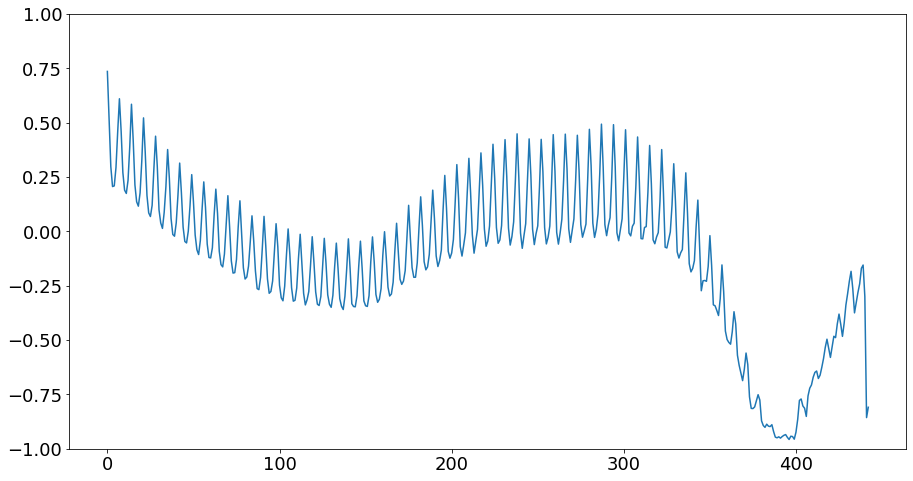

In [298]:
plt.plot(lag, corr_cruz)
plt.ylim(-1,1)

(-1.0, 1.0)

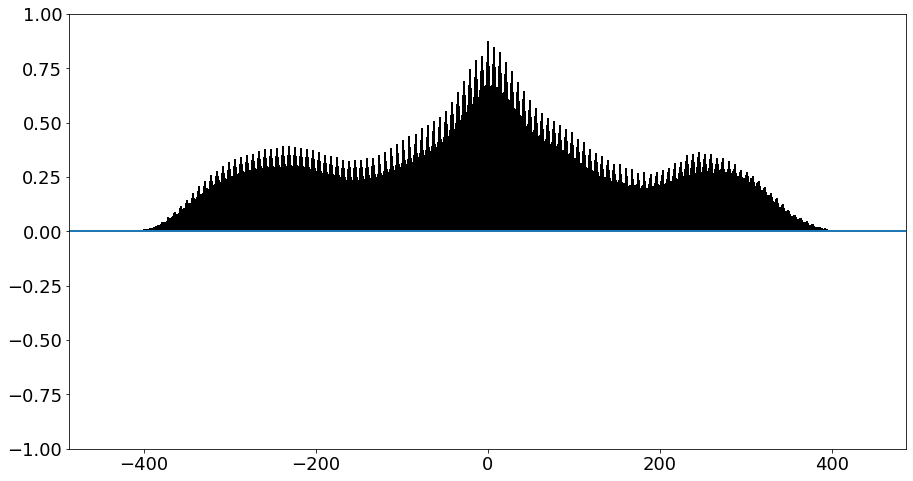

In [299]:
# pode ser utizada a função xcorr() do matplotlib para verificar a correlação cruzada
import numpy as np

# copiando o dataset para utilizar a função já que se os 2 dados são de tipo int um erro é gerado ao utilizar a função
dados_teste = dados_sp

# alterando o tipo dos dados para float
dados_teste['obitos_novos'] = dados_teste['obitos_novos'].astype('float')
dados_teste['casos_novos'] = dados_teste['casos_novos'].astype('float')

# plotando o gráfico usando a função de correlação cruzada / usevlines=True plota um gráfico de barra, False plota um scatterplot
# maxlags define o número de lags que deseja gerar / lw=2 define o peso da linha a ser gerada
plt.xcorr(dados_teste['obitos_novos'], dados_teste['casos_novos'], usevlines=True, maxlags=None, lw=2)
plt.ylim(-1, 1)

# Desafio 07: Estudar outros municípios.



In [300]:
# o munícipio selecionado é Santo André, onde resido
# definindo o dataset com os dados de Santo André
dados_sa = dados.query("nome_munic == 'Santo André'")
dados_sa.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
534   Santo André      3547809   25  ...  -23,6737  -46,5432              9
1179  Santo André      3547809   26  ...  -23,6737  -46,5432              9
1824  Santo André      3547809   27  ...  -23,6737  -46,5432              9
2469  Santo André      3547809   28  ...  -23,6737  -46,5432              9
3114  Santo André      3547809   29  ...  -23,6737  -46,5432              9

[5 rows x 26 columns]

Text(0, 0.5, 'Número de casos')

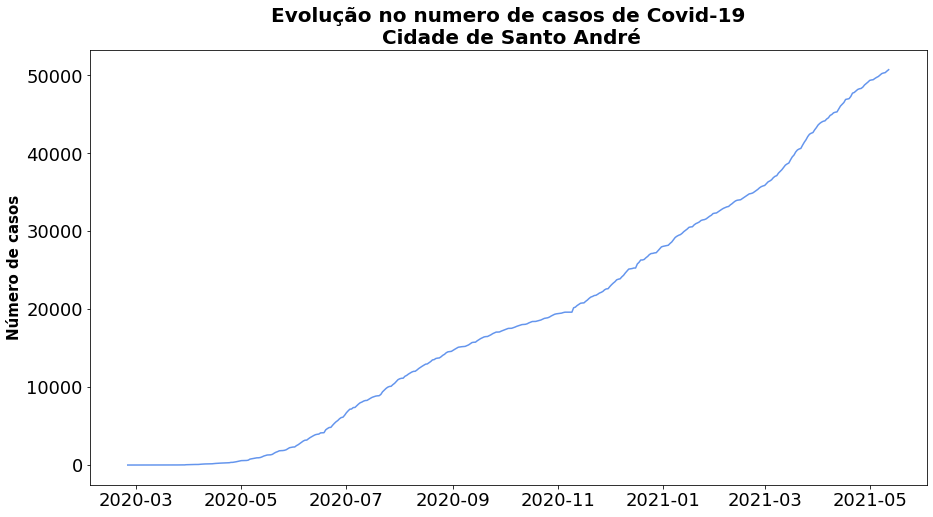

In [301]:
# aumento do número de casos ao longo do tempo
sns.lineplot(data=dados_sa, x='datahora', y='casos', color='cornflowerblue')
plt.title('Evolução no numero de casos de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

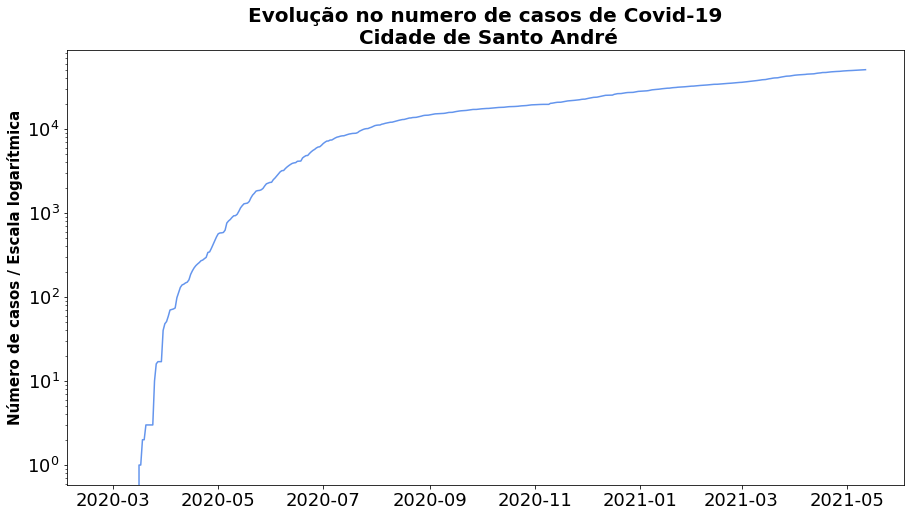

In [302]:
# evolução do número de casos em base logarítmica
sns.lineplot(data=dados_sa, x='datahora', y='casos', color='cornflowerblue')
plt.title('Evolução no numero de casos de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos / Escala logarítmica', fontsize=15, fontweight='bold')
plt.yscale('log')

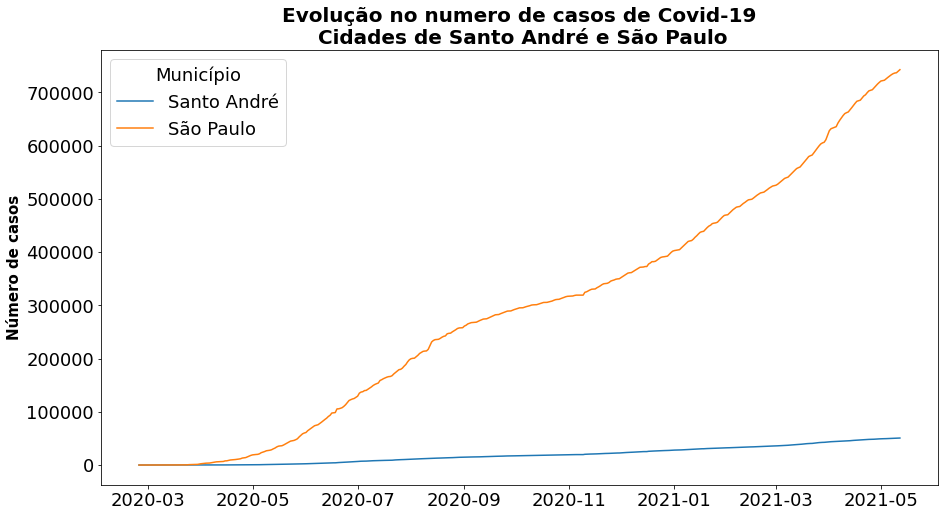

In [303]:
# comparando com a cidade de SP

# criando uma series com os 2 municipios
dados_combinados = dados.query("nome_munic == 'Santo André' or nome_munic == 'São Paulo'")

sns.lineplot(data=dados_combinados, x='datahora', y='casos', hue='nome_munic')
plt.title('Evolução no numero de casos de Covid-19\n Cidades de Santo André e São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.legend(title='Município')

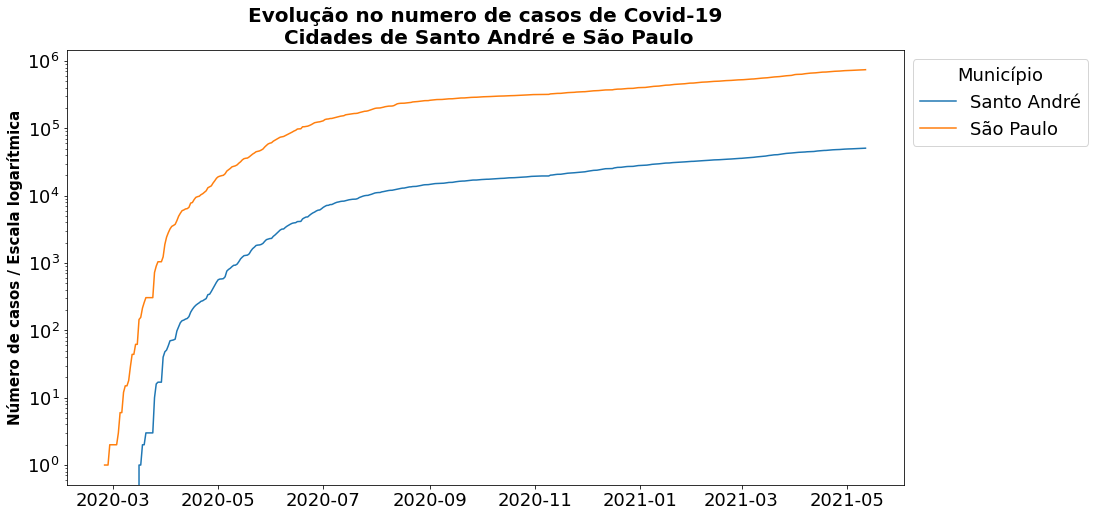

In [304]:
# comparando com a cidade de São Paulo com escala logarítmica
sns.lineplot(data=dados_combinados, x='datahora', y='casos', hue='nome_munic')

plt.title('Evolução no numero de casos de Covid-19\n Cidades de Santo André e São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos / Escala logarítmica', fontsize=15, fontweight='bold')
plt.yscale('log')
plt.legend(title='Município', bbox_to_anchor=(1,1))

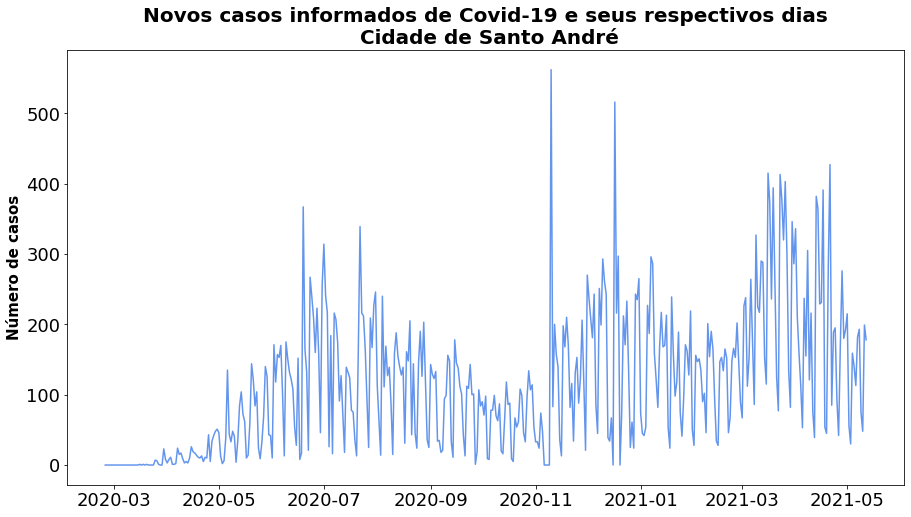

Text(0, 0.5, 'Número de óbitos')

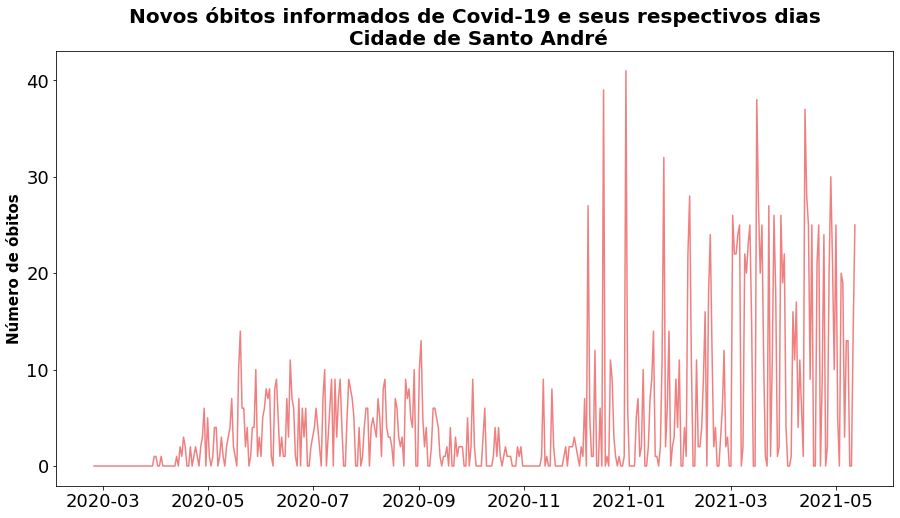

In [305]:
# numero de casos e óbitos novos para santo andre
sns.lineplot(data=dados_sa, x='datahora', y='casos_novos', color='cornflowerblue')
plt.title('Novos casos informados de Covid-19 e seus respectivos dias\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

sns.lineplot(data=dados_sa, x='datahora', y='obitos_novos', color='lightcoral')
plt.title('Novos óbitos informados de Covid-19 e seus respectivos dias\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

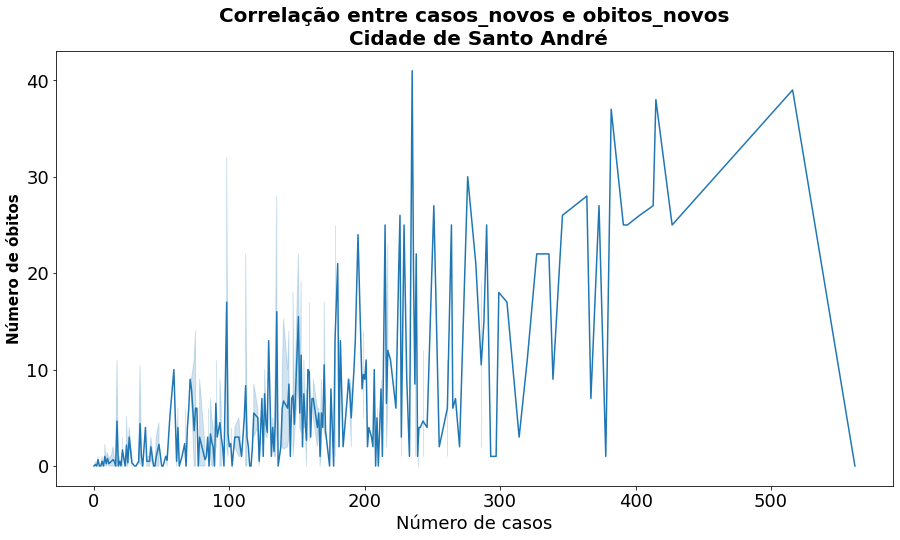

In [306]:
# correlação entre o numero de casos novos e óbitos novos para santo andré
sns.lineplot(data=dados_sa, x='casos_novos', y='obitos_novos')
plt.title('Correlação entre casos_novos e obitos_novos\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('Número de casos')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')
plt.show()

In [307]:
# calculando a média móvel de casos e óbitos para santo andré
dados_sa['media_movel_casos'] = dados_sa['casos_novos'].rolling(window=7, center=False).mean()
dados_sa['media_movel_obitos'] = dados_sa['obitos_novos'].rolling(window=7,center=False).mean()

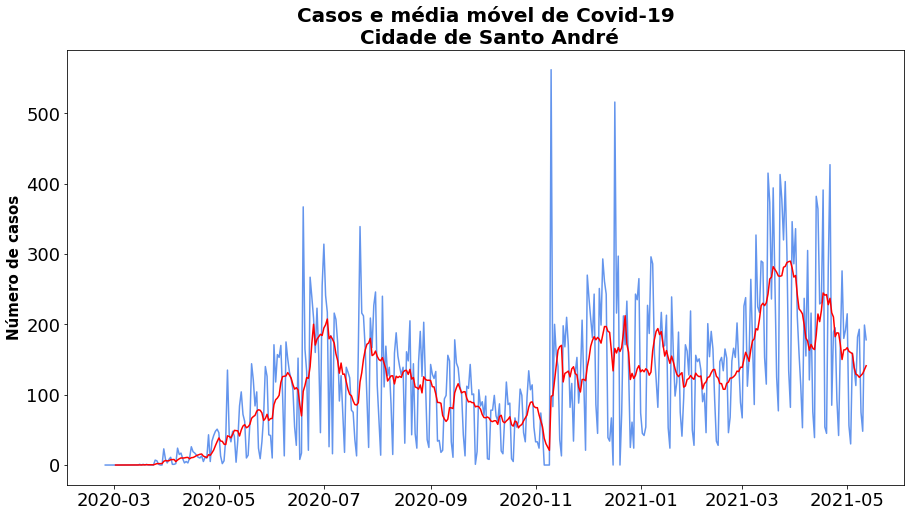

Text(0, 0.5, 'Número de óbitos')

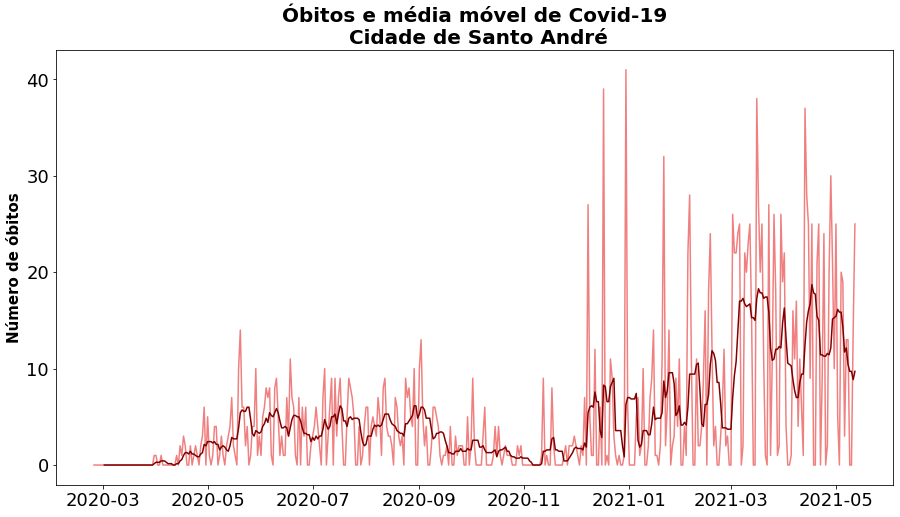

In [308]:
# plotando gráfico comparando o número de casos e óbitos com suas médias movéis
sns.lineplot(data=dados_sa, x='datahora', y='casos_novos', color='cornflowerblue')
sns.lineplot(data=dados_sa, x='datahora', y='media_movel_casos', color='red')
plt.title('Casos e média móvel de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

sns.lineplot(data=dados_sa, x='datahora', y='obitos_novos', color='lightcoral')
sns.lineplot(data=dados_sa, x='datahora', y='media_movel_obitos', color='maroon')
plt.title('Óbitos e média móvel de Covid-19\n Cidade de Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')

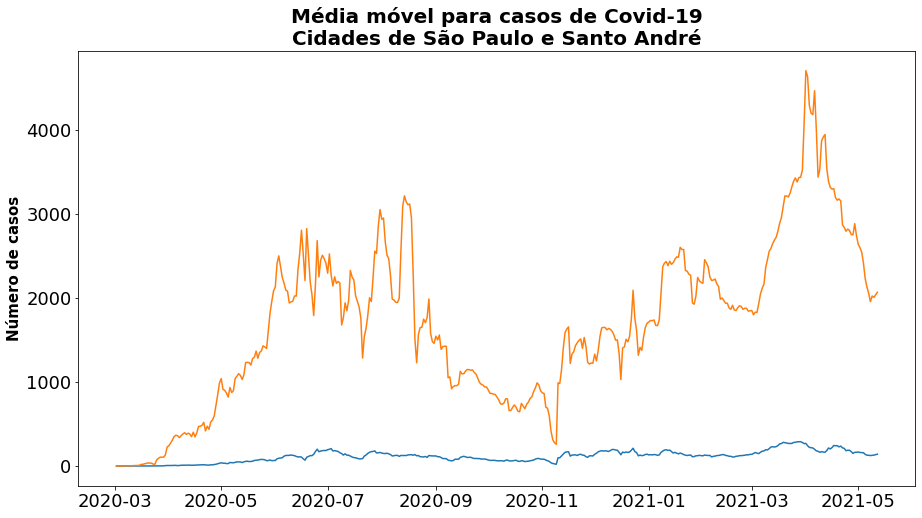

Text(0, 0.5, 'Número de óbitos')

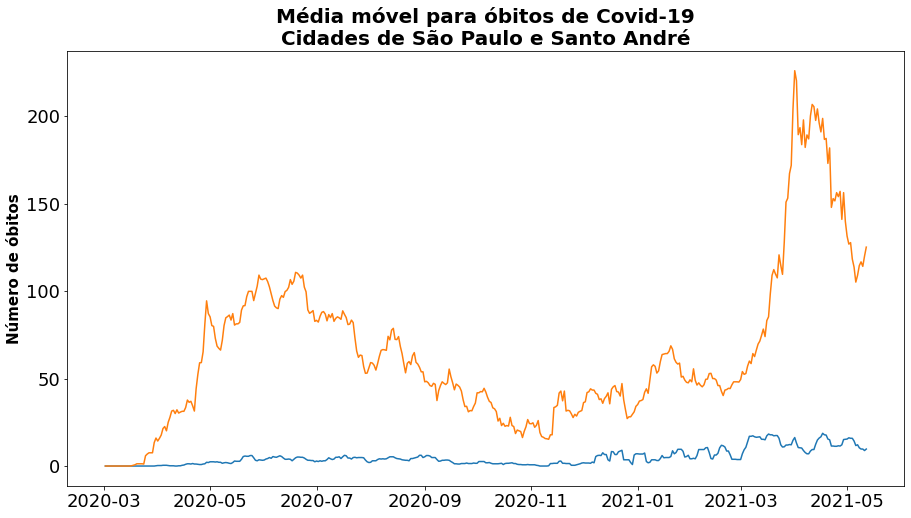

In [309]:
# comparação entre a média móvel de casos e óbitos de santo andré e são paulo
sns.lineplot(data=dados_sa, x='datahora', y='media_movel_casos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos')

plt.title('Média móvel para casos de Covid-19\nCidades de São Paulo e Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')
plt.show()

sns.lineplot(data=dados_sa, x='datahora', y='media_movel_obitos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos')

plt.title('Média móvel para óbitos de Covid-19\nCidades de São Paulo e Santo André', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Número de óbitos', fontsize=15, fontweight='bold')


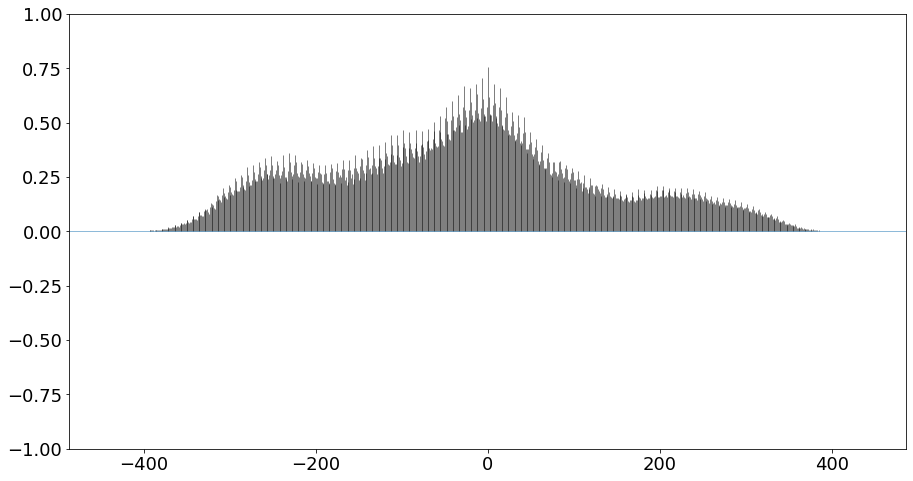

In [310]:
plt.xcorr(dados_sa['casos_novos'].astype('float'), dados_sa['obitos_novos'], maxlags=None, usevlines=True, lw=0.5)
plt.ylim(-1, 1)
plt.show()

# Aula 2 - Primeiras Previsões

### Nessa aula começa a ser utilizado a biblioteca Prophet do Facebook.

In [311]:
# para utilizar a biblioteca Prophet o dataframe precisa estar de uma maneira que a biblioteca entenda
# Criando um novo dataframe
df = pd.DataFrame()

In [312]:
# o Prophe precisa de 2 colunas. Uma com nome 'ds' com os dados de tempo
df['ds'] = dados_sp['datahora']

In [313]:
# a outra coluna com o nome 'y' recebe os dados que queremos prever, em nosso estudo os casos de covid
df['y'] = dados_sp['casos_novos']

In [314]:
df.head()

ds    y
562  2020-02-25  0.0
1207 2020-02-26  0.0
1852 2020-02-27  0.0
2497 2020-02-28  1.0
3142 2020-02-29  0.0

In [315]:
# importando a biblioteca Prophet / essa é maneira de importar no Google Colab, em outras IDEs o procedimento pode ser diferente
from fbprophet import Prophet

O Prophet executa um algoritmo de Machine Learning. Para isso precisamos criar  de um modelo.

O algoritmo de ML analisa os dados e busca ajustar uma reta para dados que crescem de maneira linear. E assim criar uma reta que se ajuste da melhor maneira possível aos dados.

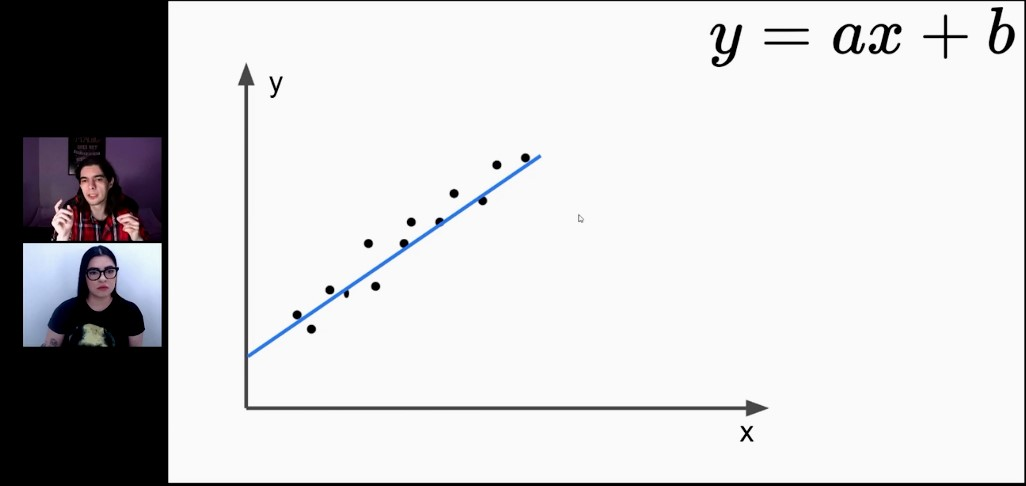

### Para os nossos dados, que não crescem de maneira linear, há uma curva de crescimento mais complexo. É necessário identificar o coeficientes de um modelo adequado para conseguir prever o número de casos futuros. 

In [316]:
# definindo o Prophet() em variável
modelo = Prophet()

In [317]:
# para treinar o modelo de ML com os nossos dados utilizamos a função fit() e informamos o dataframe que criamos com as colunas 'ds' e 'y'.
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### O algoritmo de Machine Learning irá buscar um coeficiente para predizer dados futuros com base nos dados informados. O algoritmo assume que exista uma tendência nos dados, que os dados já foram tratados. Se os dados informados estão "ruins" a previsão não será de qualidade.

In [318]:
# para visualizar a previsão é necessário um dataframe  com as informações das datas que desejamos prever
# na função abaixo o parametro periods indica para quantos dias no futuro a previsão será realizada
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [319]:
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [320]:
# o dataframe com as datas já foi criado, agora precisamos criar um dataframe com as previsões
# abaixo usamos a função predict() informando o dataframe com as datas que foi criado anteriormente
previsao = modelo.predict(dataframefuturo)

In [321]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -114.303728  ...                         0.0  386.013224
1 2020-02-26  -96.932780  ...                         0.0  457.834930
2 2020-02-27  -79.561833  ...                         0.0  571.148167
3 2020-02-28  -62.190885  ...                         0.0  306.251181
4 2020-02-29  -44.819937  ...                         0.0  -13.995200

[5 rows x 16 columns]

### No dataframe acima (previsao) temos diversas colunas que foram criadas pelo Prophet. A primeira coluna e a ds que foi informada com base nos dados_sp, e a última coluna é a **yhat**, essa coluna é nossa estimativa. Em matemática o símbolo ^ (hat/chapeuzinho) geralmente indica previsão.

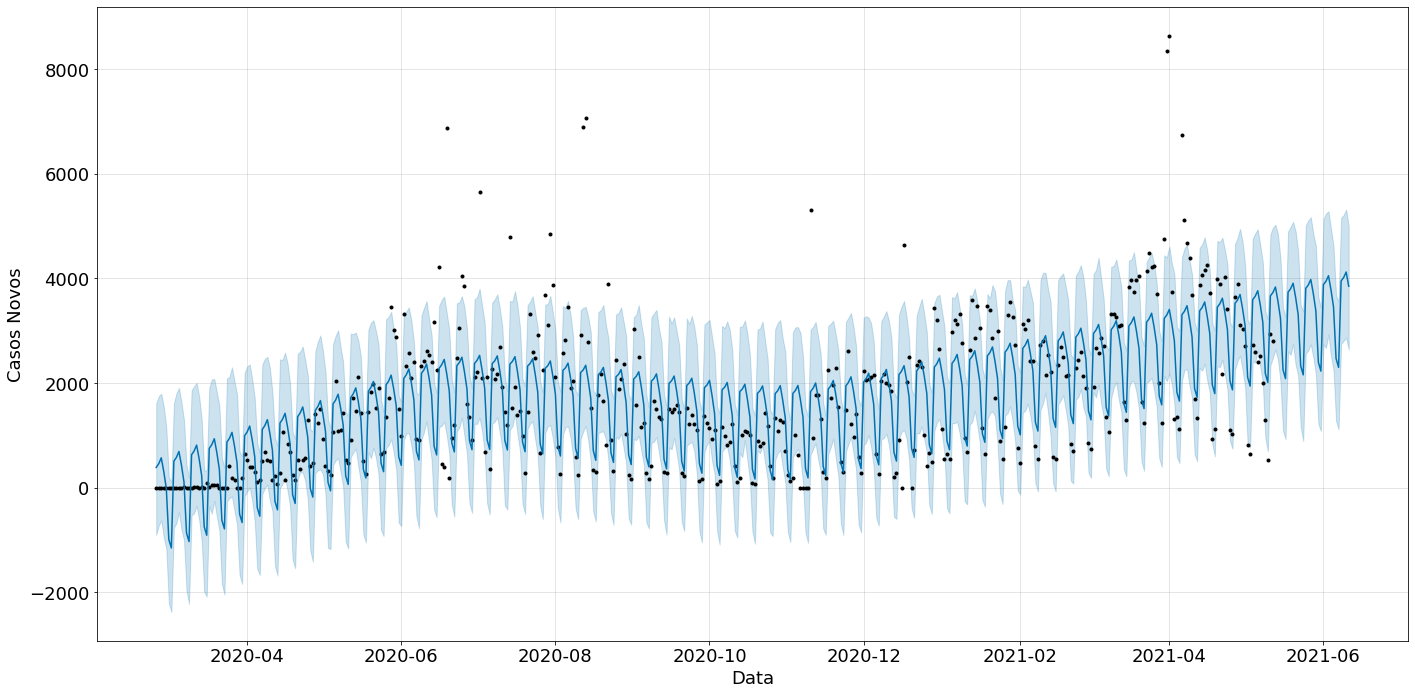

In [322]:
# plotando o gráfico com base no modelo gerado. É necessário colocar um ; ao final senão serão gerados 2 figuras idênticas
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20, 10));

### Na imagem acima temos vários pontos pretos, esse são nossos dados reais e que foram informados ao Prophet. O algoritmo procurou se adequar aos dados informados e criou a linha azul com base nos dados que foram informados.

### A região azul claro indica um intervalo de confiança gerado pelo algoritmo indicando até onde os dados podem estar.

### A direita da imagem temos uma sequência de valores sem os pontos pretos. Ele segue a mesma sequência de subir e descer dos dados originais. Quando fizemos o fit() no Prophet foi mostrado que foi desabilitado a sazonabilidade anual e diária.

### Alguns dos pontos pretos estão fora da linha azul e do intervalo de confiança. Um modelo de ML se ajusta a maioria dos dados, ele não percorre todos os dados. Se o modelo se ajustar a todos os dados é gerado um problema chamado overfit, o modelo está muito ajustado aos dados informados.

In [323]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -114.303728  ...                         0.0  386.013224
1 2020-02-26  -96.932780  ...                         0.0  457.834930
2 2020-02-27  -79.561833  ...                         0.0  571.148167
3 2020-02-28  -62.190885  ...                         0.0  306.251181
4 2020-02-29  -44.819937  ...                         0.0  -13.995200

[5 rows x 16 columns]

### Olhando a imagem e o dataframe previsao, podemos idenficar as colunas **yhat_upper** e **yhat_lower**. Essas são as colunas que geram o **intervalo de confiança**.

### As colunas **trend_lower, trend_upper, additive_terms**, etc, são utilizadas pelo prophet para definir a coluna **yhat**. 

### Após ser gerado a previsão dos nossos dados, não temos com o que comparar para identificar se o modelo está bem ajustado ou não.

### Para isso geralmente separamos os dados em 2 grupos, um que será utilizado para o treino do modelo e o outro grupo será usado para testar o modelo.

### Sempre deixamos a maior parte dos dados para treinar o modelo e uma pequena parte para o teste.

### Nos nossos dados temos informação de mais de 1 ano. Assim vamos pegar as primeiras 400 datas para o treino e o restante para testar.

### Essa relação geralmente é 70% para treino e 30% para teste.

In [324]:
# divindo os dados entre treino e teste
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400] # pegando os primeiros 400 valores
df['y'] = dados_sp['casos_novos'][:400]

In [325]:
# verificando o tamanho do nosso dataframe original, há 443 linhas. Como 400 foram para o treino, existem 43 que podem ser usadas no teste
dados_sp.shape

(443, 31)

In [326]:
# com os novos dados definidos vamos passar por todos os passos novamente
modelo = Prophet()

In [327]:
# treinando o modelo
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [328]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [329]:
previsao = modelo.predict(dataframefuturo)

In [330]:
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -137.621348  ...                         0.0  320.078004
1 2020-02-26 -119.843618  ...                         0.0  337.016324
2 2020-02-27 -102.065887  ...                         0.0  494.014021
3 2020-02-28  -84.288157  ...                         0.0  256.493471
4 2020-02-29  -66.510426  ...                         0.0   -7.395631

[5 rows x 16 columns]

In [331]:
# criando um dataframe com os dados de teste
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

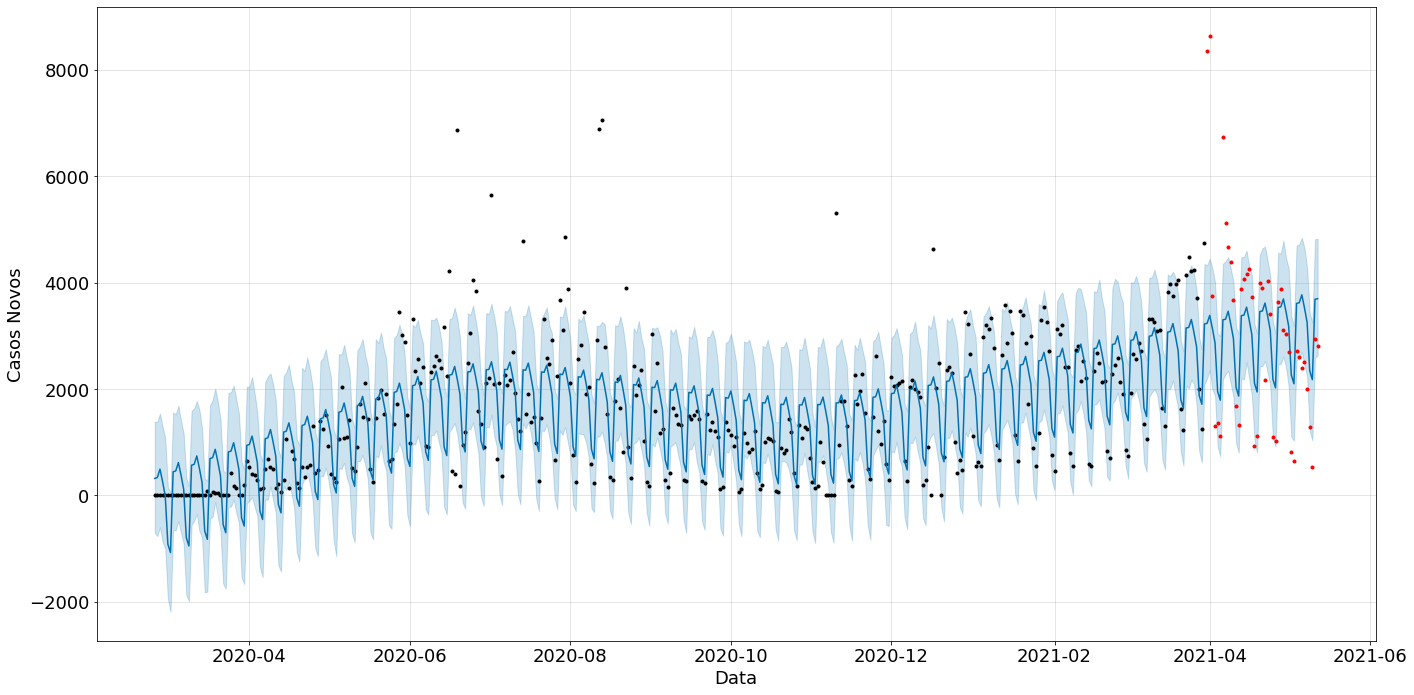

In [332]:
# plotando o gráfico da previsão novamente
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(20, 10));

# plotando os nosso dados de teste em cima do gráfico para comparar
plt.plot(df_teste['ds'], df_teste['y'], '.r') # o '.r' define a cor vermelha para os pontos desses dados

### No gráfico acima podemos ver que os dados reais estão, em sua maioria, fora do modelo previsto pelo Prophet. Lembrando que essa previsão foi gerada sem passarmos nenhum parâmetro para o Prophet.

### Abaixo será feita a decomposição da série temporal analisada pelo Prophet.

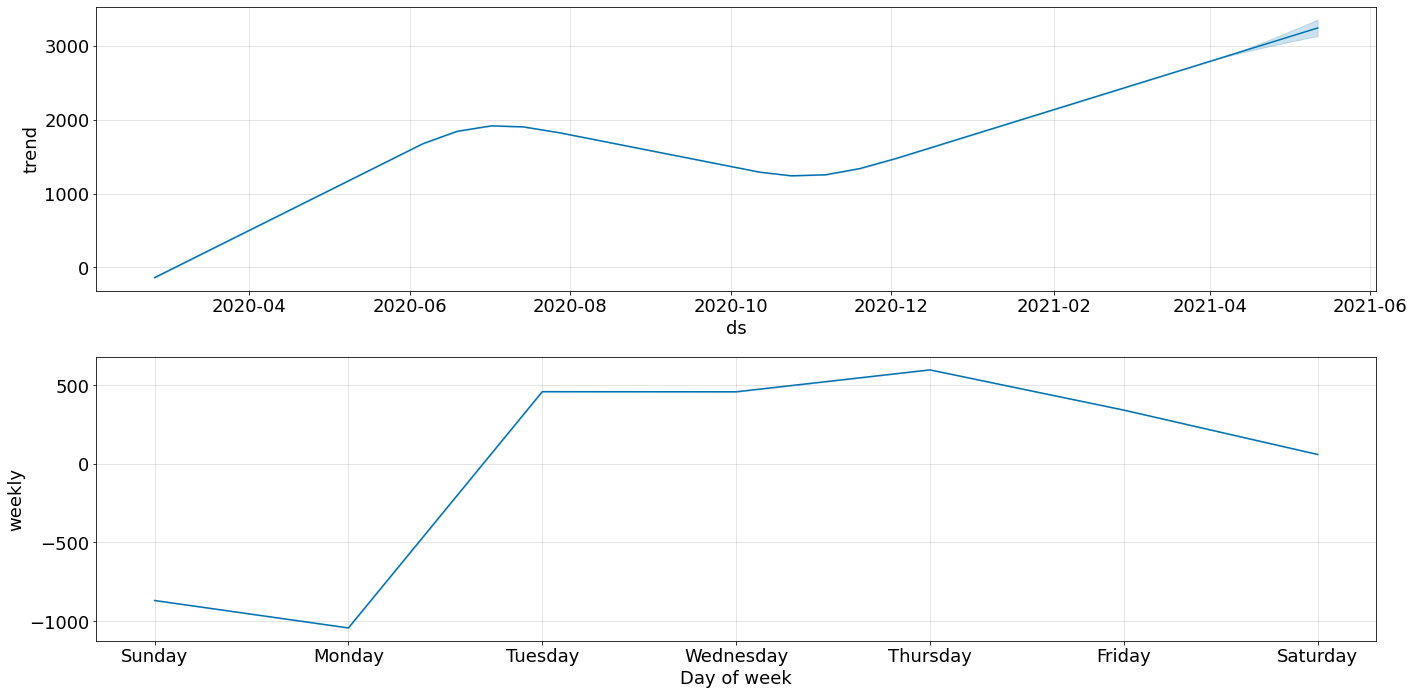

In [333]:
# para visualizar os componentes que o Prophet identificou an analisar os dados é usada a função plot_components()
modelo.plot_components(previsao, figsize=(20, 10));

### - Na primeira imagem temos a tendência idêntificada pelo Prophet e essa é a linha guia utilizada ao plotar o gráfico anterior.

### - Na segunda imagem temos a sazonabilidade semanal identificada pelo Prophet.

# Desafio 08: Mudar os períodos de previsão.

In [334]:
# dividindo os dados para verificar uma previsão de 60 dias
df_60 = pd.DataFrame()
df_60['ds'] = dados_sp['datahora'][:383]
df_60['y'] = dados_sp['casos_novos'][:383]

df_teste_60 = pd.DataFrame()
df_teste_60['ds'] = dados_sp['datahora'][383:]
df_teste_60['y'] = dados_sp['casos_novos'][383:]

In [335]:
# identificando a variável utilizando o Prophet
modelo_60 = Prophet()

In [336]:
# realizando o treinamento do modelo
modelo_60.fit(df_60)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [337]:
# criando o dataframe com os dados previstos
dataframefuturo = modelo_60.make_future_dataframe(periods=60)

In [338]:
# gerando o dataframe do Prophet
previsao_60 = modelo_60.predict(dataframefuturo)
previsao_60.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -113.755627  ...                         0.0  309.248263
1 2020-02-26  -96.434574  ...                         0.0  345.893593
2 2020-02-27  -79.113522  ...                         0.0  518.068105
3 2020-02-28  -61.792470  ...                         0.0  267.448578
4 2020-02-29  -44.471417  ...                         0.0    2.537118

[5 rows x 16 columns]

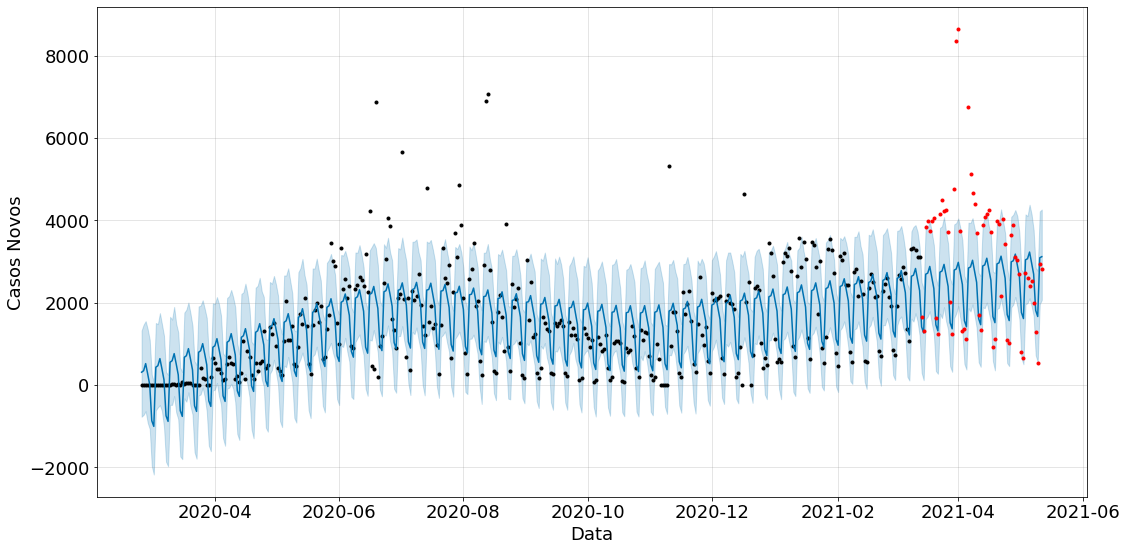

In [339]:
# plotando a previsão do modelo gerado pelo Prophet
modelo_60.plot(previsao_60, xlabel='Data', ylabel='Casos Novos', figsize=(16, 8));

# plotando os dados de teste
plt.plot(df_teste_60['ds'], df_teste_60['y'], '.r')

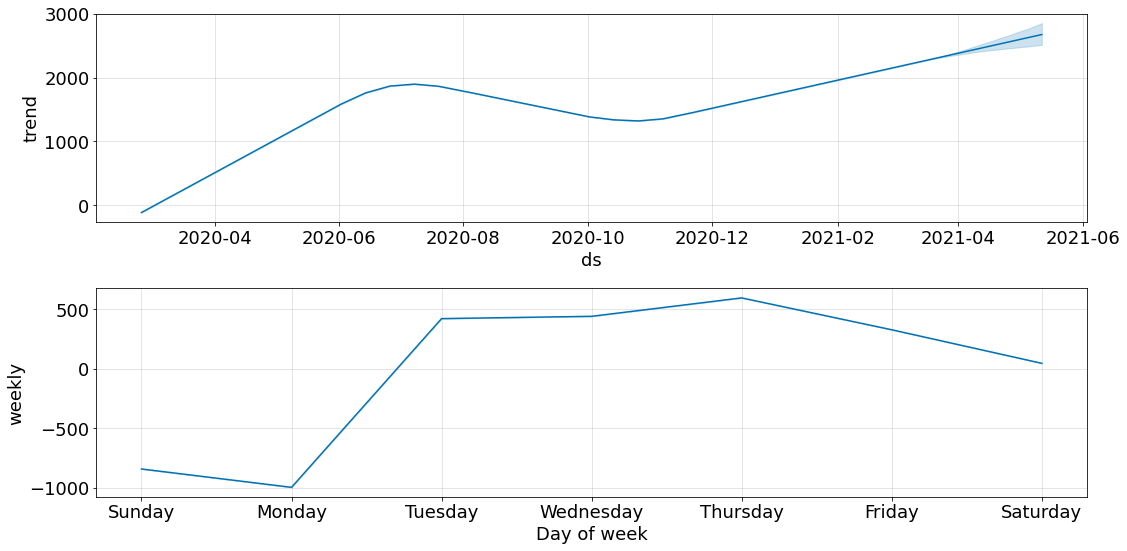

In [340]:
# verificando a decomposição dos dados identificados pelo Prophet
modelo_60.plot_components(previsao_60, figsize=(16, 8));

In [341]:
# realizando a previsão para um período de 120 dias
# criando novo df para a verificação de 120 dias
df_120 = pd.DataFrame()
df_120['ds'] = dados_sp['datahora'][:323]
df_120['y'] = dados_sp['casos_novos'][:323]

# criando dataset com os dados para teste
df_teste_120 = pd.DataFrame()
df_teste_120['ds'] = dados_sp['datahora'][323:]
df_teste_120['y'] = dados_sp['casos_novos'][323:]

# criando o modelo para 120 dias
modelo_120 = Prophet()

# treinando o modelo com os dados de 120 dias
modelo_120.fit(df_120)

# criando o dataframe para receber os dados previstos
dataframefuturo = modelo_120.make_future_dataframe(periods=120)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [342]:
# realizando a previsão para os 120 dias
previsao_120 = modelo_120.predict(dataframefuturo)

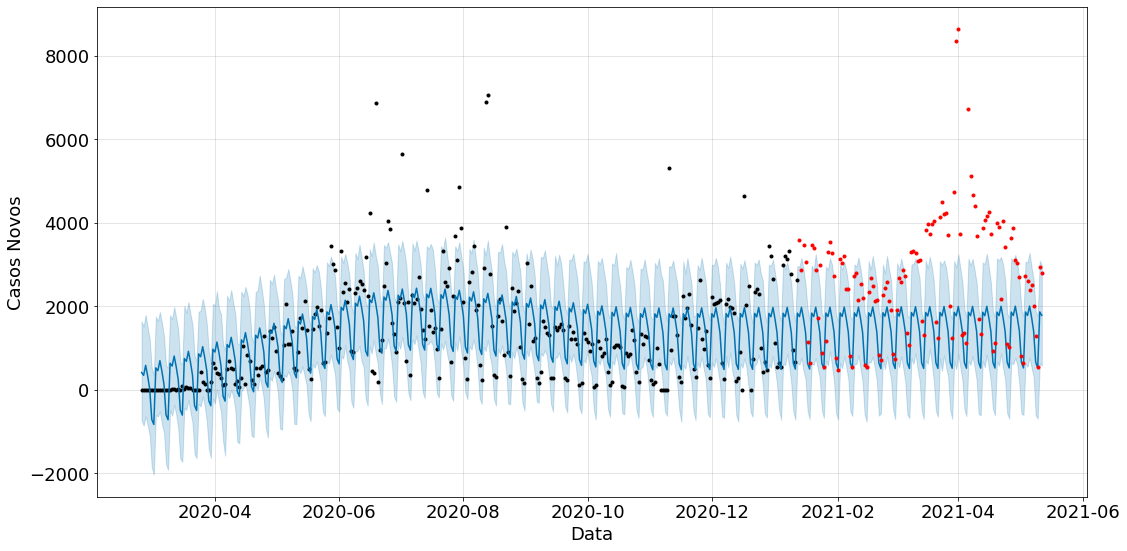

In [343]:
# plotando o gráfico com os dados previstos
modelo_120.plot(previsao_120, xlabel='Data', ylabel='Casos Novos', figsize=(16, 8))

# plotando o gráfico com os dados de teste para 120 dias
plt.plot(df_teste_120['ds'], df_teste_120['y'], '.r')

### Quanto mais dados reais temos para treinar o modelo melhor fica a previsão dos dados futuros. A previsão para 120 dias possui muito menos dados de teste dentro da previsão e do intervalo de confiança.

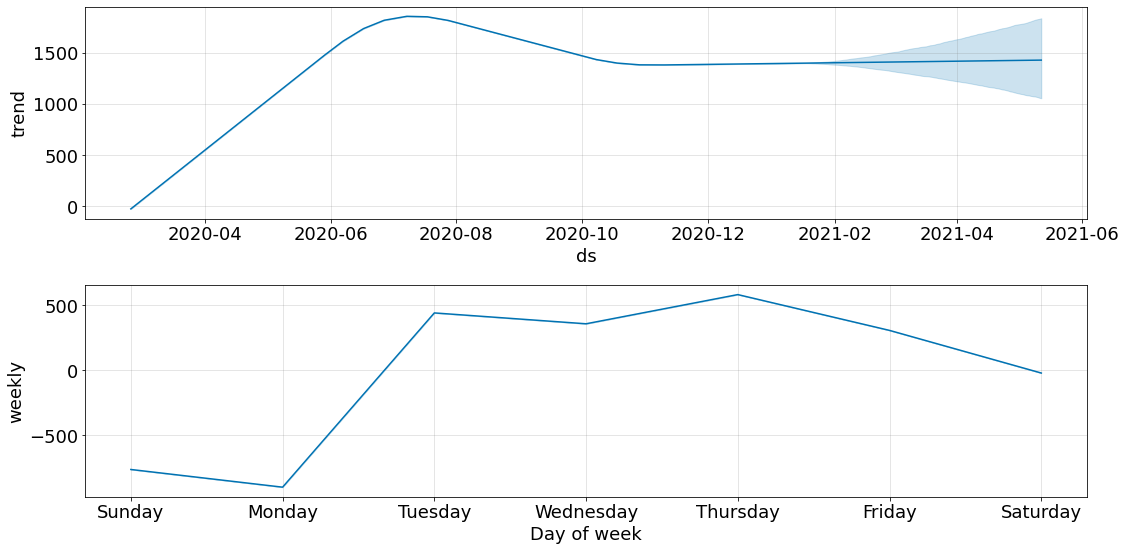

In [344]:
modelo_120.plot_components(previsao_120, figsize=(16, 8));

# Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.



[Documentação do Facebook Prophet](https://facebook.github.io/prophet/)

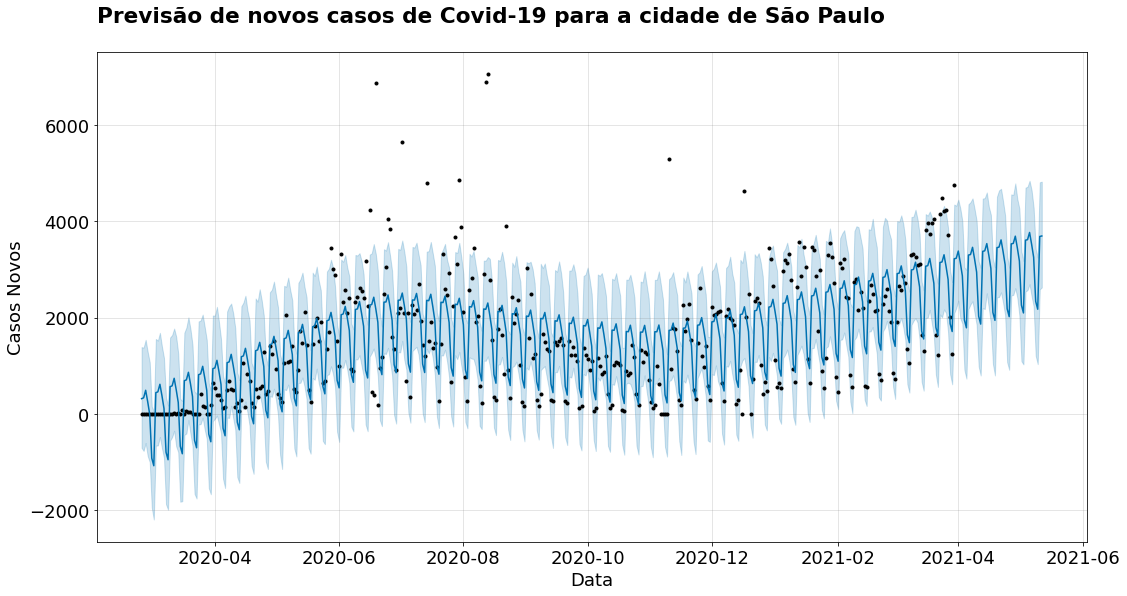

In [345]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos Novos', figsize=(16, 8))
plt.title('Previsão de novos casos de Covid-19 para a cidade de São Paulo\n', fontweight='bold', loc='left')
plt.show()

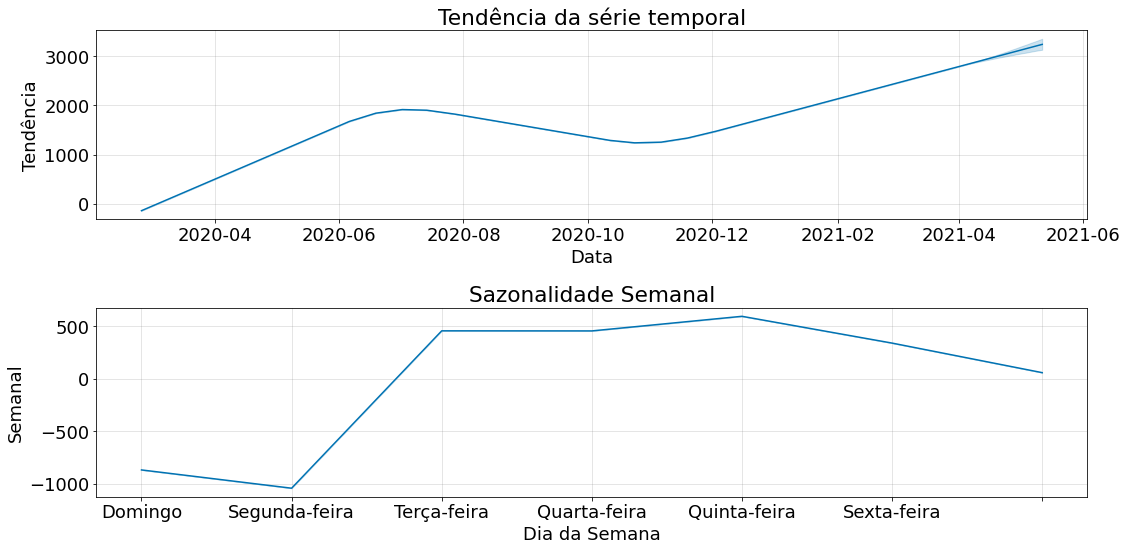

In [346]:
fig_componentes = modelo.plot_components(previsao, figsize=(16, 8))

# buscando a informação dos eixos da figura gerada
eixos = fig_componentes.get_axes()

# definindo os parâmetros para o primeiro gráfico gerado na figura
eixos[0].set_title('Tendência da série temporal')
eixos[0].set_ylabel('Tendência')
eixos[0].set_xlabel('Data')

# definindo os parâmetros para o segundo gráfico gerado na figura
eixos[1].set_title('Sazonalidade Semanal')
eixos[1].set_ylabel('Semanal')
eixos[1].set_xlabel('Dia da Semana')
eixos[1].set_xticks(range(0, 7)) # definindo os ticks do eixo X para o segundo gráfico
eixos[1].set_xticklabels(['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira']) # definição dos nomes dos ticks do eixo x

fig_componentes.tight_layout()
plt.show()

# Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados.



In [347]:
df_acumulado = pd.DataFrame()
df_teste_acumulado = pd.DataFrame()

# dataframe com os dados de treino do modelo / 70% dos dados totais
df_acumulado['ds'] = dados_sp['datahora'][:310]
df_acumulado['y'] = dados_sp['casos'][:310]

# dataframe com os dados de teste do modelo / 30% dos dados totais
df_teste_acumulado['ds'] = dados_sp['datahora'][310:]
df_teste_acumulado['y'] = dados_sp['casos'][310:]

In [348]:
# criando a classe do Prophet
modelo_acumulado = Prophet()

In [349]:
# treinando o modelo com os dados
modelo_acumulado.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [350]:
# criando o dataframe para receber os dados da previsão
dataframefuturo = modelo_acumulado.make_future_dataframe(periods=133)

In [351]:
# criando a previsão e preenchendo o dataframefuturo
previsao_acumulado = modelo_acumulado.predict(dataframefuturo)

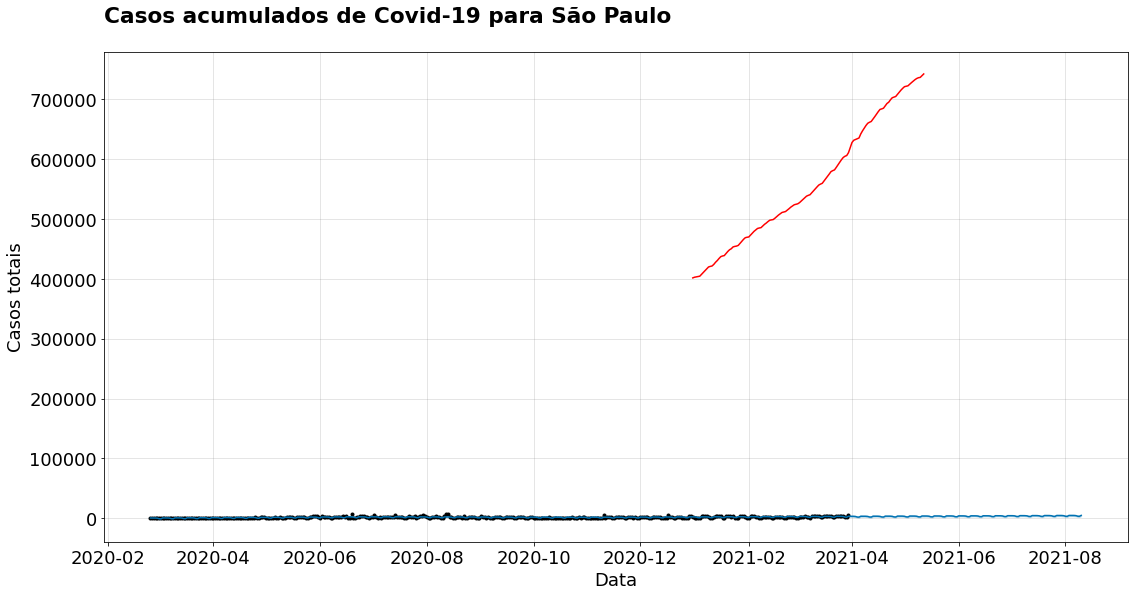

In [352]:
# plotando o gráfico com a previsão do modelo
modelo_acumulado.plot(previsao_acumulado, xlabel='Data', ylabel='Casos totais', figsize=(16, 8))
plt.title('Casos acumulados de Covid-19 para São Paulo\n', loc='left', fontweight='bold')

# plotando os dados de teste para comparação
plt.plot(df_teste_acumulado['ds'], df_teste_acumulado['y'], 'r')

plt.show()

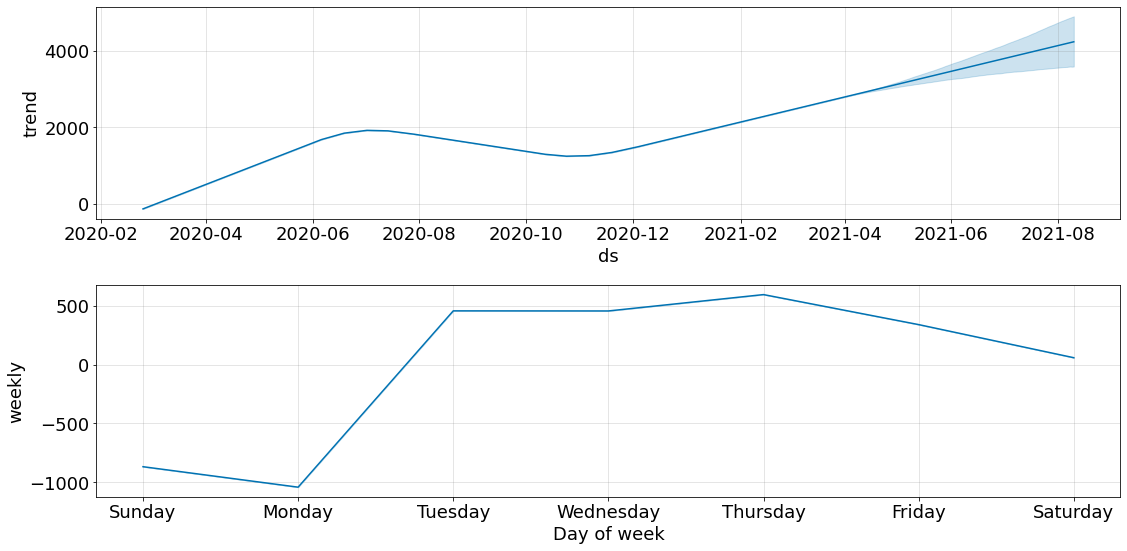

In [353]:
modelo.plot_components(previsao_acumulado, figsize=(16, 8));

# Aula 3 - Mudança de tendência e changepoints

In [354]:
# importando um novo módulo do Prophet para que possamos melhorar os parâmetros do modelo e assim adequa-lo melhor as nosso dados
# changepoints são pontos de mudança de tendência em um série temporal
from fbprophet.plot import add_changepoints_to_plot

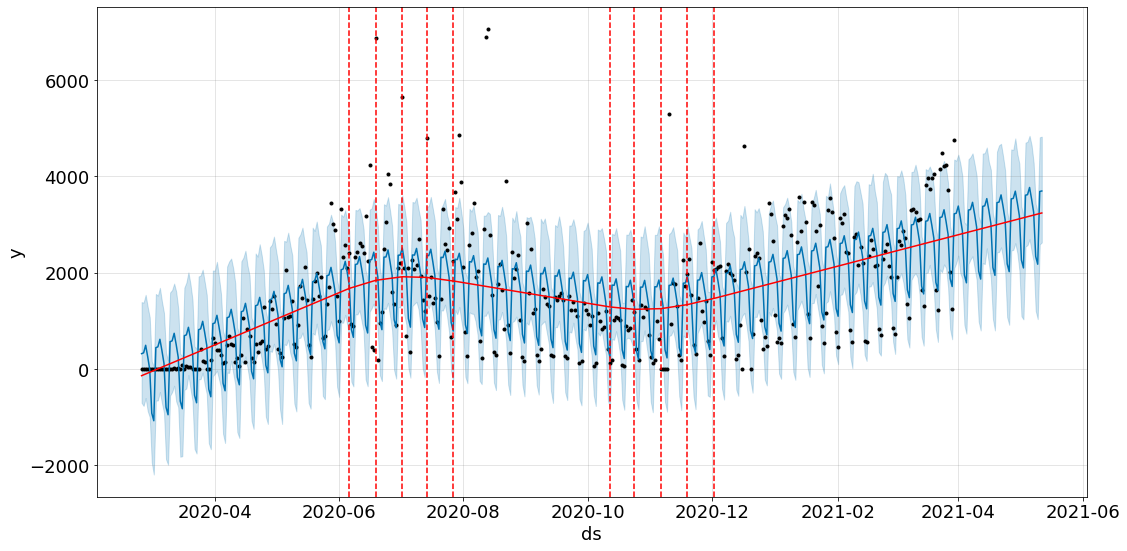

In [355]:
# plotando o gráfico novamente para adicionar os changepoints, salvando a imagem em uma variável
fig = modelo.plot(previsao, figsize=(16, 8))

# adicionando os changepoints, nos parâmentros informamos a figura, o modelo e também a previsão que foi realizada pelo modelo
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### A tendência é o padrão que os dados estão seguindo, seja de crescimento, decrescimento ou estabilização. Os changepoints são alterações nessa tendência. 

In [361]:
# adicionando agora um parâmetro informando o máximo de changepoints a serem colocados na previsão
# adicionando o parâmetro para alterar a escala dos changepoints
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)

In [362]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [363]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [364]:
previsao = modelo.predict(dataframefuturo)

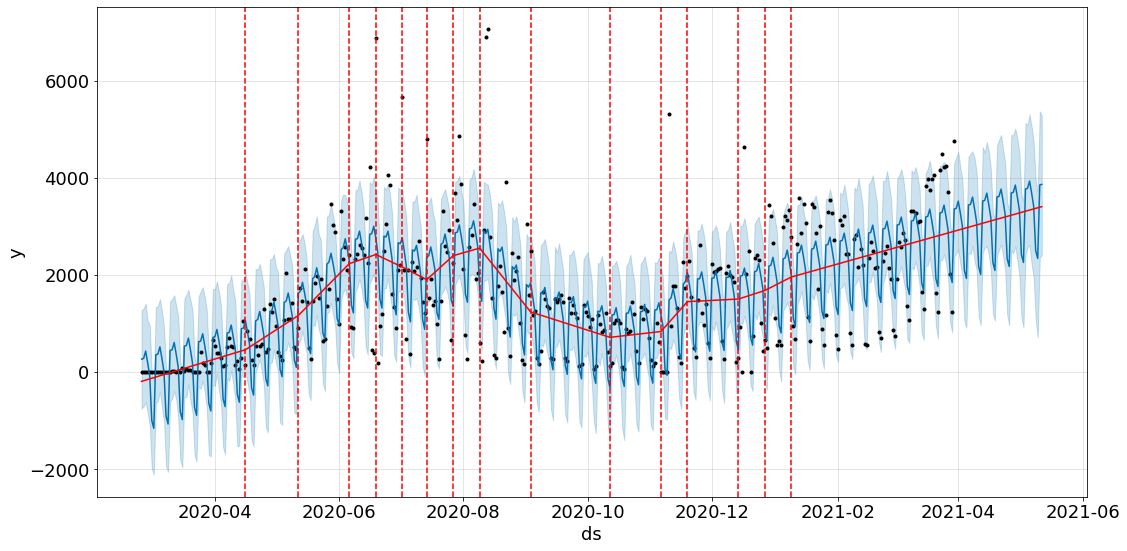

In [365]:
# plotando o gráfico novamente para verificar se algo alterou com o parâmetro adicionado
fig = modelo.plot(previsao, figsize=(16, 8))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### - Alterando primeiramente o número máximo de changepoints para serem considerados pelo modelo não alterou a tendência identificada pelo Prophet.

### - Alterando a escala dos changepoints para 10.0 vemos uma grande diferença no gráfico quando comparado ao anterior. Esse parâmetro aumenta a flexibilidade (fazendo com que os pontos muito fora da curva sejam mais considerados), a sensibilidade a alterações na tendência, e o intervalo de confiança ao redor da curva principal. Deve se tomar cuidado com essas alterações para não tornar o modelo completamente ajustado aos nossos dados (overfit) e assim prejudicar as previsões futuras.

### Se alterarmos a escala de sensibilidade dos changepoints para um número muito pequeno, o modelo pode não ser capaz de identificar qualquer mudança e assim traçar uma reta direta.

### - O parâmentro changepoint_range altera a porcentagem do dados onde podem ser inseridos changepoints. Por padrão o Prophet() permite inserir changepoints nos primeiros 80% dos dados, deixando os últimos 20% livre, alterando esse parâmetro podemos inserir pontos nesses ultimos 20%.

In [368]:
# criando o modelo novamente e adicionando um changepoint específico
modelo = Prophet(changepoints=['2020-12-31'])

modelo.fit(df)

dataframefuturo = modelo.make_future_dataframe(periods=43)

previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


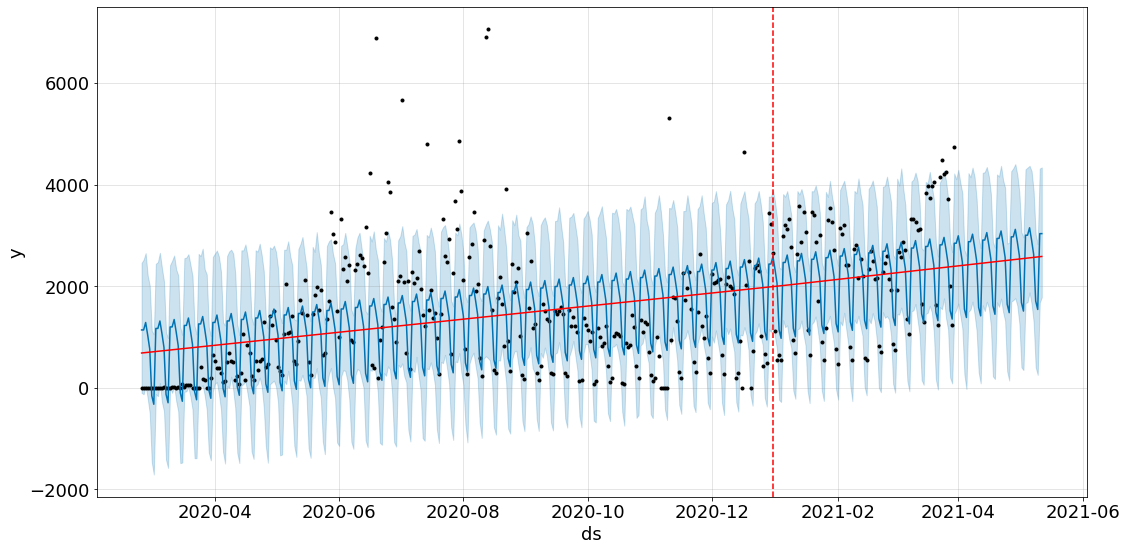

In [369]:
fig = modelo.plot(previsao, figsize=(16, 8))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

# Desafio 11: Identificar potenciais changepoints.



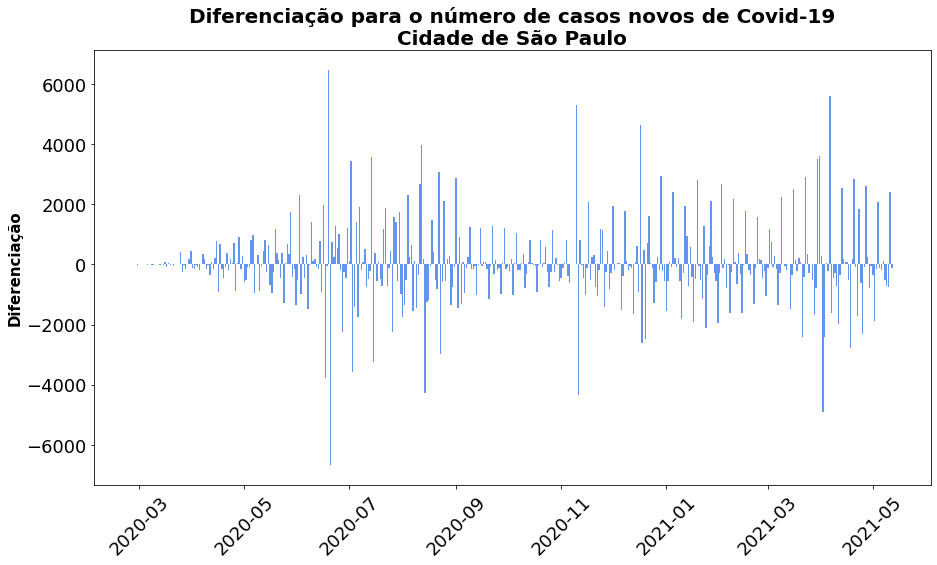

In [370]:
# utilizando o gráfico de diferenciação para identificar possíveis changepoints
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'], color='cornflowerblue')
plt.title('Diferenciação para o número de casos novos de Covid-19\nCidade de São Paulo', fontsize = 20, fontweight = 'bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Diferenciação', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

### - Analisando o gráfico da diferenciação, quando temos períodos com mais barras longas com valores positivos e um número menor de barras curtas e negativas, indica um período de aumento nos casos. O inverso indica um decréscimo no número de casos ao longo do período.

### - Temos um período de crescimento no gráfico até meados de junho. Durante o mês de junho temos predominância de barras no setor negativo do gráfico, o que indica uma diminuição no número de casos novos diários.

### - Entre junho e julho a queda de casos se mantém e entre julho e agosto há um novo aumento do número de casos.

### - A partir da metade de agosto até o fim de outubro vemos um decréscimo no número de casos.

### - Iniciando em novembro vemos um aumento nos número de casos que se mantém até meados de janeiro.

### - Em janeiro temos uma queda no número de casos até o início de março.

### - Iniciando em março vemos um crescimento no número de casos até o final dos dados disponíveis.

# Desafio 12: Desenvolver uma função roda o modelo automaticamente.



In [388]:
def treinar_modelo (dataframe, periodo_previsao: int):
  # definindo o modelo
  modelo = Prophet()

  # treinando o modelo com o dataframe informado
  modelo.fit(dataframe)

  # criando o dataframe que receberá a previsão
  dataframefuturo = modelo.make_future_dataframe(periods=periodo_previsao)

  # realizando a previsão
  previsao = modelo.predict(dataframefuturo)

  return modelo, previsao

def plot_modelo (modelo, df_previsao, titulo: str, eixo_x: str, eixo_y: str):
  # plotando o gráfico com a previsão e definindo os labels para os eixos e o título
  fig = modelo.plot(df_previsao, xlabel = eixo_x, ylabel = eixo_y, figsize=(16, 8));
  plt.title(titulo, fontweight='bold', loc='left', fontsize = 15, color='dimgrey')

In [389]:
modelo, previsao = treinar_modelo(df, 43)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


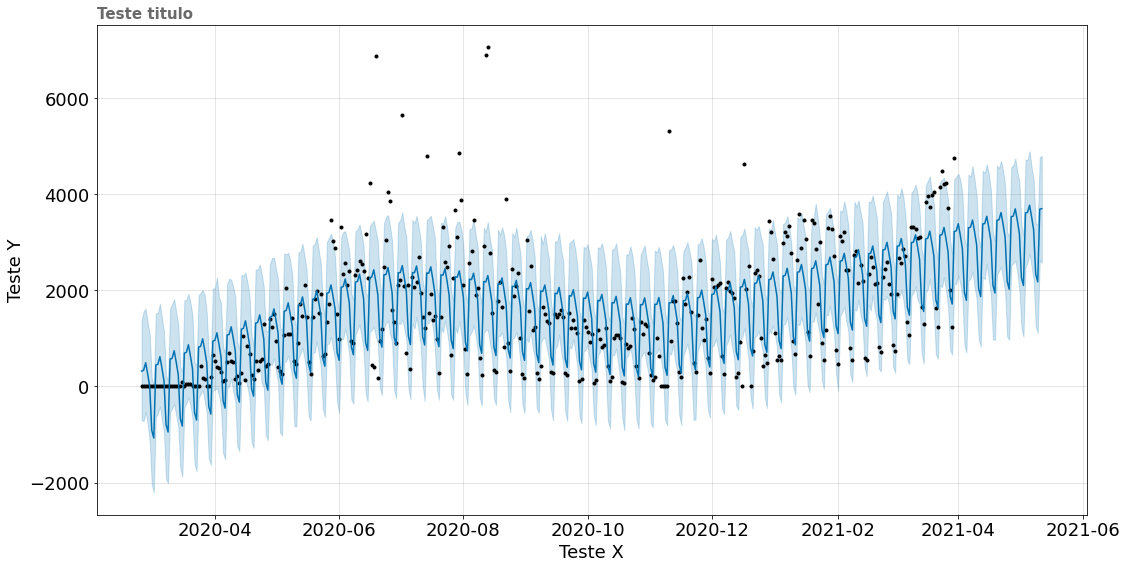

In [390]:
plot_modelo(modelo, previsao, 'Teste titulo', 'Teste X', 'Teste Y')